# Analysis of the autism data

In [19]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


* This section aims at answering a few questions related to the different algorithms used, with the aim of optimizing our classification framework.

**Parameters or potential settings**

* The approach used, which could be Logistic Regression, Decision Tree, Explainable Boosting Machine, Neural Additive models, or XGBoost.
* The use or not of indicator variables as inputs. 
* The scaling of the data. 
* The imputation approach when the learning algorithms does not handle them by design. It could be constant imputation (called encoding here), or conditional imputation (mean, knn, or mice).
* The sampling method in the case of imbalance learning (either no down-sampling, vanilla (random sampling of the minority class until classes are balanced), or SMOTE (a more elaborated sampling).
* The number of features, between 2 and 6. 
* The number of folds when cross-validating the results. 

**Notes on the classification pipeline:**

* Two datasets are age-matched but one (scenario `asd_td_age_matched_n_balanced`) lead to relatively balanced classes, whereas the scenario `asd_td_age_matched_n_unbalanced` has slightly younger kids and so leverage the amount of young neuro-typical kids, and is more unbalanced. 
* No searches on hyper-parameters are performed on each of the approach. Cross-validation is performed with the stratified inner-fold being left-out, the model is fitted on the training set, and the prediction of the test set is done with predictions stored for later evaluation of performances. 
* since a lot of settings parameters are tested, we test all of the hypothesis with a default setting that is: Encoding of the missing variables, scaling of the data, no use of indicator variables, no down-sampling (???), and a 16-fold cross-validation.
* Features selection were made for the two scenario suing the features with the higher importance based on xgboost importance map.
* Classification here is between autistic and neurotypical participants.



**Among the questions at stakes:**

* Experiment 1: Shall we use indicator variables? For each scenario (columns of axes), ad each dimension of the problem (rows of axes) , x is the `use_of_indicator_variables`, y is an indicator of performances (typically the F1 score), and the hue variable are the approaches. The plots are performed for no imputations, 
* Experiement 2: Shall we scale data or not ? 
* Experiment X: for the algorithms handling missing variables (xgboost, nam with encoding) , shall we let them be missing, or imputed ? 

## Experiment 1.  `use_missing_indicator_variables`

In [20]:
approach = 'xgboost'

for use_missing_indicator_variables in [False, USE_MISSING_INDICATOR_PREDICTORS]:
    
    df =  pd.read_csv(AUTISM_DATA_PATH)

    data = Dataset(df=df, 
                   missing_data_handling='without', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = deepcopy(DEFAULT_PREDICTORS), 
                    scale_data=False,
                    use_missing_indicator_variables=use_missing_indicator_variables, 
                   verbosity=0,
                   scenario='multimodal_2023',#'papers',
                   proportion_train=1)

    exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach=approach, 
                      previous_experiment=None,        
                      debug=False, 
                      experiment_folder_name='13_november_scale_pos_weight', 
                      experiment_name = 'use_Z',
                      verbosity=0, 
                      save_experiment=True)
    exp.fit_predict(num_cv='loocv')
    display(exp.performances_df)


467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0           use_Z  0.856   0.471        0.905             0.197                  0.967                           0.485               0.279     0.854                                   0.423                                               0.64                                                        0.88                                             0.39                                               0.11                                 0.953                                    0.36                              0.61                            0.047  32  367  50  18

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0           use_Z  0.863   0.504        0.925             0.233                   0.98                           0.484                 0.3     0.863                                   0.419                                                0.6                                                       0.894                                            0.405                                              0.117                                 0.949                                     0.4                             0.595                            0.051  30  373  44  20

## Experiment 2  `scale_data`

In [21]:

for scale_data in [True, False]:
            

    df =  pd.read_csv(AUTISM_DATA_PATH)

    data = Dataset(df=df, 
                   missing_data_handling='without', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = deepcopy(DEFAULT_PREDICTORS), 
                    scale_data=scale_data,
                    use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS, 
                   verbosity=0,
                   scenario='multimodal_2023',#'papers',
                   proportion_train=1)

    exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach=approach, 
                      previous_experiment=None,        
                      debug=False, 
                      experiment_folder_name='13_november_scale_pos_weight', 
                      experiment_name = 'Scale Data',
                      verbosity=0, 
                      save_experiment=True)
    exp.fit_predict(num_cv='loocv')
    display(exp.performances_df)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Scale Data  0.863   0.504        0.925             0.233                   0.98                           0.484                 0.3     0.863                                   0.419                                                0.6                                                       0.894                                            0.405                                              0.117                                 0.949                                     0.4                             0.595                            0.051  30  373  44  20

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Scale Data  0.863   0.504        0.925             0.233                   0.98                           0.484                 0.3     0.863                                   0.419                                                0.6                                                       0.894                                            0.405                                              0.117                                 0.949                                     0.4                             0.595                            0.051  30  373  44  20

## Experiment 3. `Imputation approach`

In [22]:

for imputation_method in ['without','mice', 'knn', 'mean', 'constant']:

    df =  pd.read_csv(AUTISM_DATA_PATH)

    data = Dataset(df=df, 
                   missing_data_handling='imputation',
                   imputation_method=imputation_method,
                   sampling_method='without',
                   scenario = 'multimodal_2023', 
                   features_name = deepcopy(DEFAULT_PREDICTORS),
                   scale_data=False, 
                   use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
                   verbosity=1, 
                   proportion_train=1)

    exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach=approach, 
                      previous_experiment=None,        
                      debug=False, 
                      experiment_folder_name='13_november_scale_pos_weight', 
                      experiment_name = 'Imputation',
                      verbosity=0, 
                      save_experiment=True)
    
    exp.fit_predict(num_cv='loocv')
    print(imputation_method)
    display(exp.performances_df)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

without


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Imputation  0.863   0.504        0.925             0.233                   0.98                           0.484                 0.3     0.863                                   0.419                                                0.6                                                       0.894                                            0.405                                              0.117                                 0.949                                     0.4                             0.595                            0.051  30  373  44  20

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

mice


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Imputation  0.876   0.533        0.931             0.248                  0.981                           0.558               0.314     0.901                                   0.503                                               0.58                                                        0.94                                            0.537                                              0.184                                 0.949                                    0.42                             0.463                            0.051  29  392  25  21

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

knn


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Imputation  0.861   0.471        0.901             0.187                   0.95                           0.512                 0.3     0.874                                   0.451                                               0.62                                                       0.904                                            0.437                                              0.131                                 0.952                                    0.38                             0.563                            0.048  31  377  40  19

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

mean


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Imputation  0.858   0.517        0.933             0.265                  0.985                           0.507               0.333     0.859                                   0.451                                               0.68                                                        0.88                                            0.405                                              0.117                                 0.958                                    0.32                             0.595                            0.042  34  367  50  16

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

constant


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      Imputation  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18

## Experiment 4. `Sampling approach`

In [23]:
approach = 'xgboost'
for sampling_method in ['without', 'vanilla', 'smote']:
    df =  pd.read_csv(AUTISM_DATA_PATH)

    data = Dataset(df=df, 
                   missing_data_handling='imputation',
                   imputation_method='constant',
                   sampling_method=sampling_method,
                   scenario = 'multimodal_2023', 
                   features_name = deepcopy(DEFAULT_PREDICTORS),
                   scale_data=False, 
                   use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
                   verbosity=1, 
                   proportion_train=1)

    exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach=approach, 
                      previous_experiment=None,        
                      debug=False, 
                      experiment_folder_name='13_november_scale_pos_weight', 
                      experiment_name = 'Sampling',
                      verbosity=0, 
                      save_experiment=True)
    
    exp.fit_predict(num_cv='loocv')
    print(sampling_method)
    display(exp.performances_df)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

without


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0        Sampling  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

vanilla


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0        Sampling  0.808   0.435         0.89             0.221                  0.979                           0.431               0.242     0.876                                   0.362                                               0.44                                                       0.928                                            0.423                                              0.125                                 0.933                                    0.56                             0.577                            0.067  22  387  30  28

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

smote


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0        Sampling  0.813   0.373         0.83             0.124                  0.896                           0.468               0.216     0.859                                     0.4                                               0.58                                                       0.892                                            0.392                                              0.111                                 0.947                                    0.42                             0.608                            0.053  29  372  45  21

# Analysis of individual cases

In [276]:
def print_participant_summary(row):
    Texte = "Profile\n"
    Texte += "Sex: {}\n".format(row['sex'])
    Texte += "Age: {}\n".format(row['age'])
    if not np.isnan(row['ados_total']):
        Texte += "ADOS Scores\n"
        Texte += "\tTotal Score: {}\n".format(row['ados_total'])
        Texte += "\tRRB: {}\n".format(row['ados_rrb'])
        Texte += "\tSA: {}\n".format(row['ados_sa'])


    if not np.isnan(row['mullen_el']):
        Texte += "Mullen Scale of Early Learning\n"
        Texte += "\tExpressive Language: {}\n".format(row['mullen_el'])
        Texte += "\tFine Motor: {}\n".format(row['mullen_fm'])
        Texte += "\tReceptive Language: {}\n".format(row['mullen_rl'])
        Texte += "\tVisual Reception: {}\n".format(row['mullen_vr'])
        Texte += "\tELC: {}\n".format(row['mullen_el'])

    if not np.isnan(row['srs_total_tscore']):
        Texte += "SRS\n"
        Texte += "\tsrs_total_tscore: {}\n".format(row['srs_total_tscore'])
        Texte += "\tsrs_social_awareness_tscore: {}\n".format(row['srs_social_awareness_tscore'])
        Texte += "\tsrs_social_motivation_tscore: {}\n".format(row['srs_social_motivation_tscore'])

    if not np.isnan(row['mchat_total']):
        Texte += "MCHAT\n"
        Texte += "\tFinal Score: {}\n".format(row['mchat_final'])
        Texte += "\tResult: {}\n".format("Positive" if row['mchat_result'] else "Negative")

    print(Texte)
    return

## True Positive examples

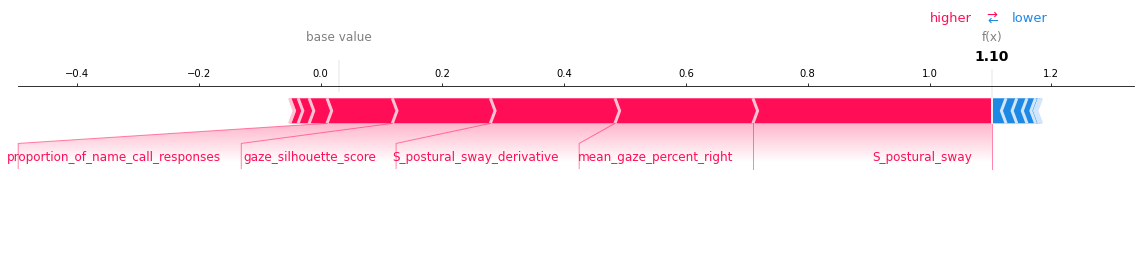

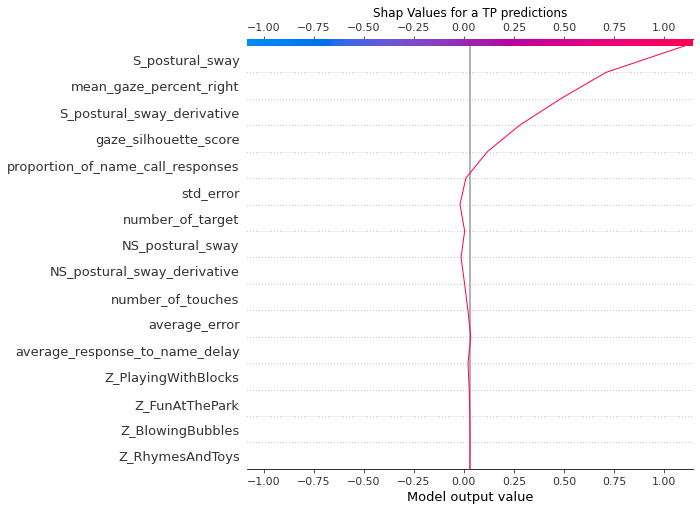

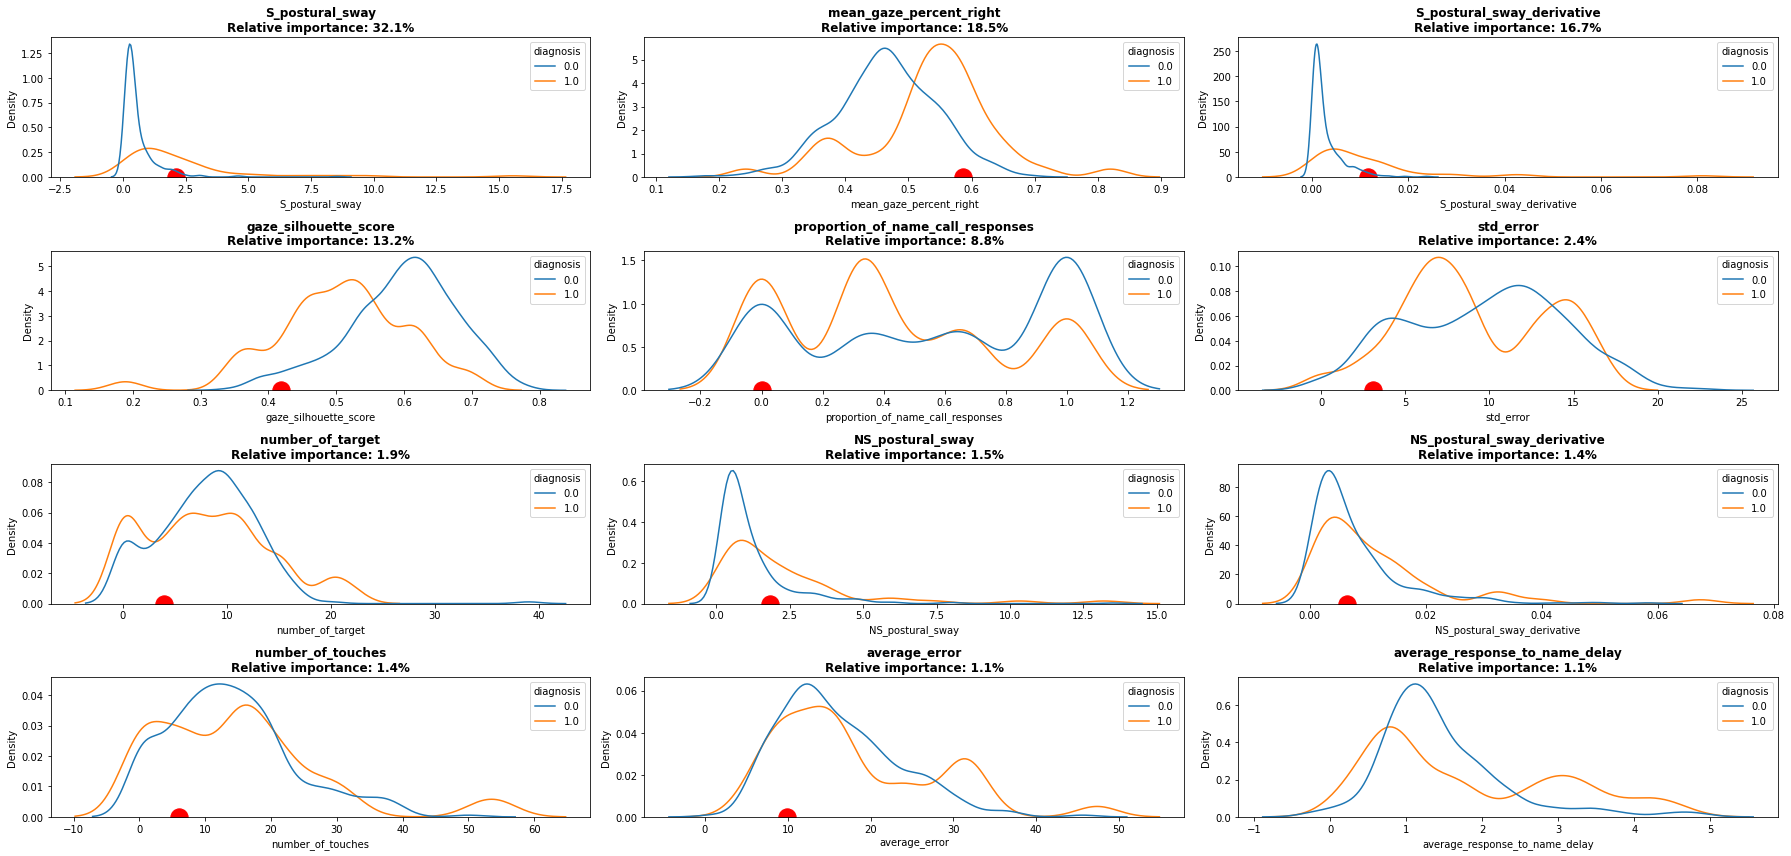

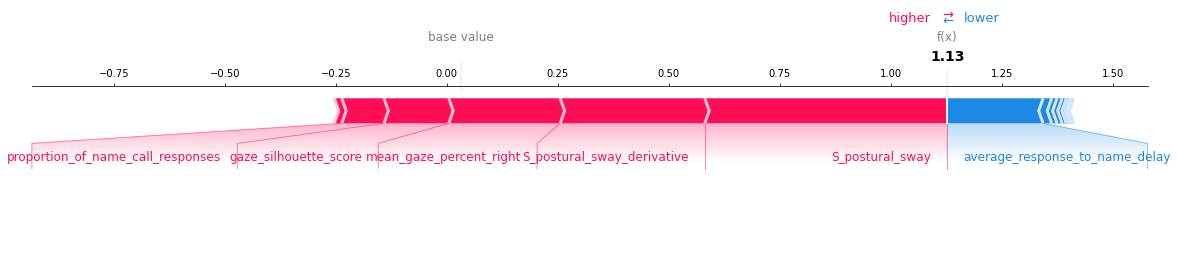

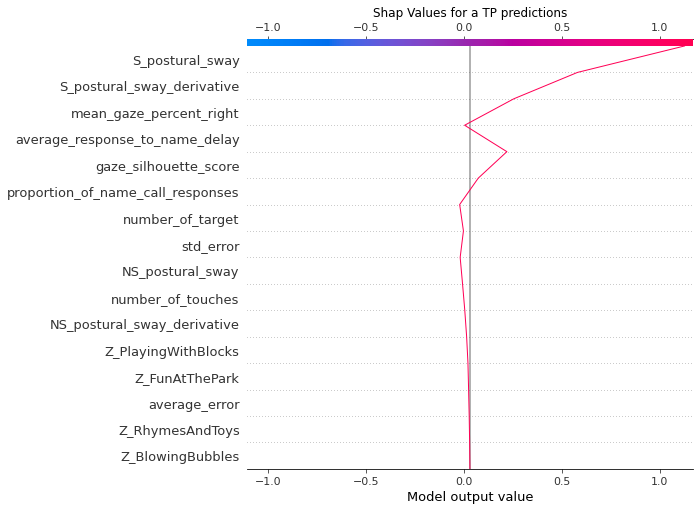

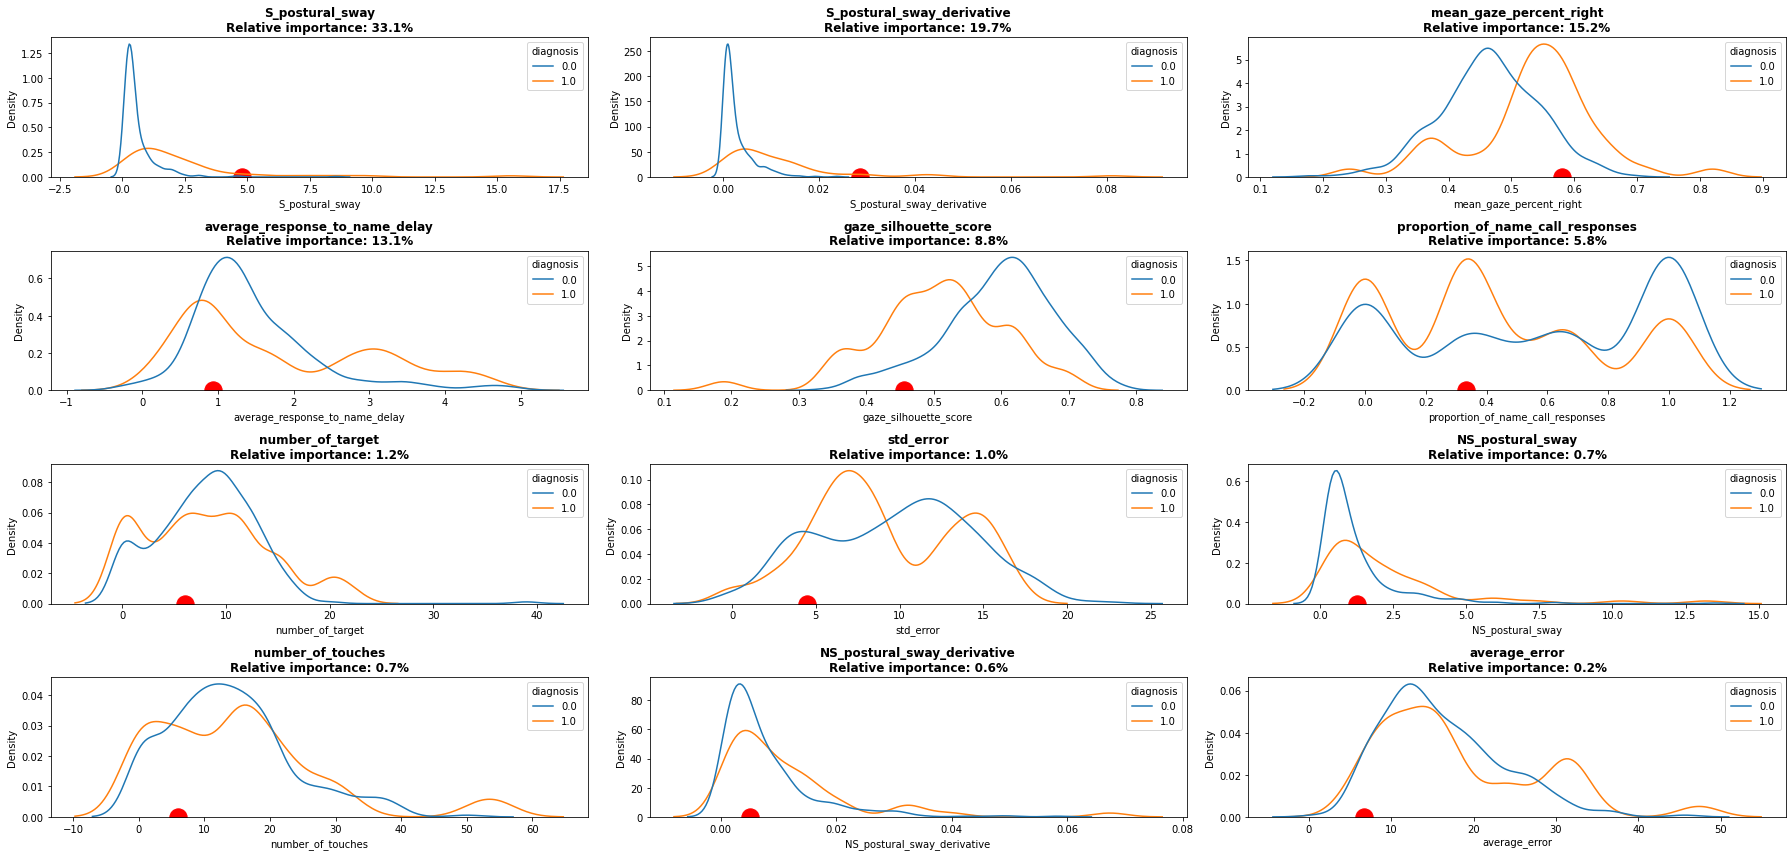

In [265]:
import shap
name = 'TP'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[-2:]

for idx in index_samples:
    plot_summary_sample(exp, idx, name)

## True Negative examples

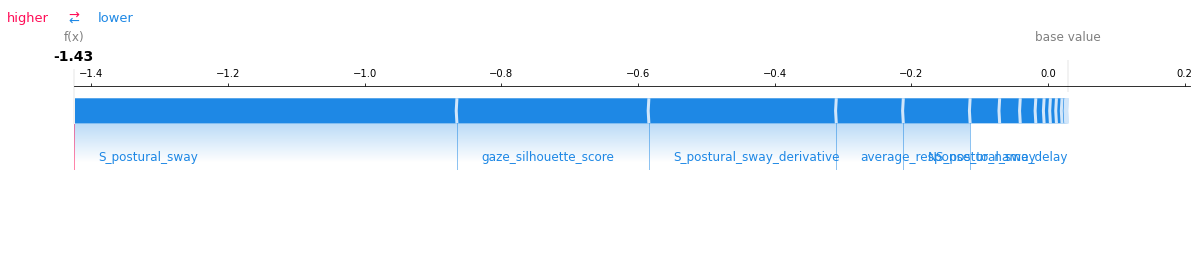

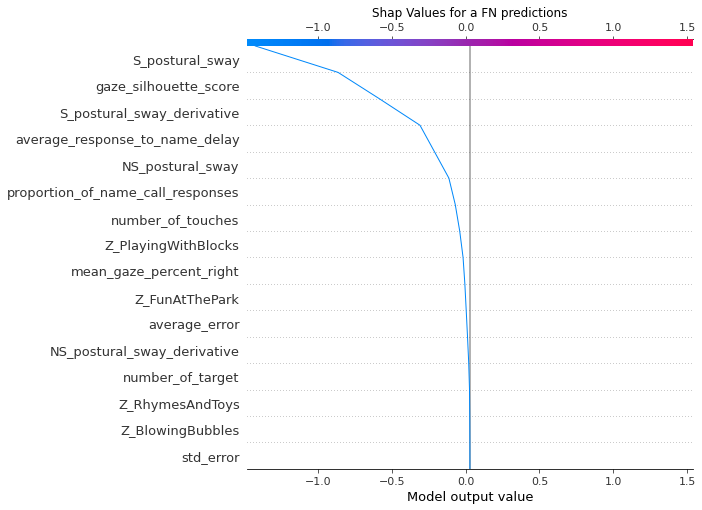

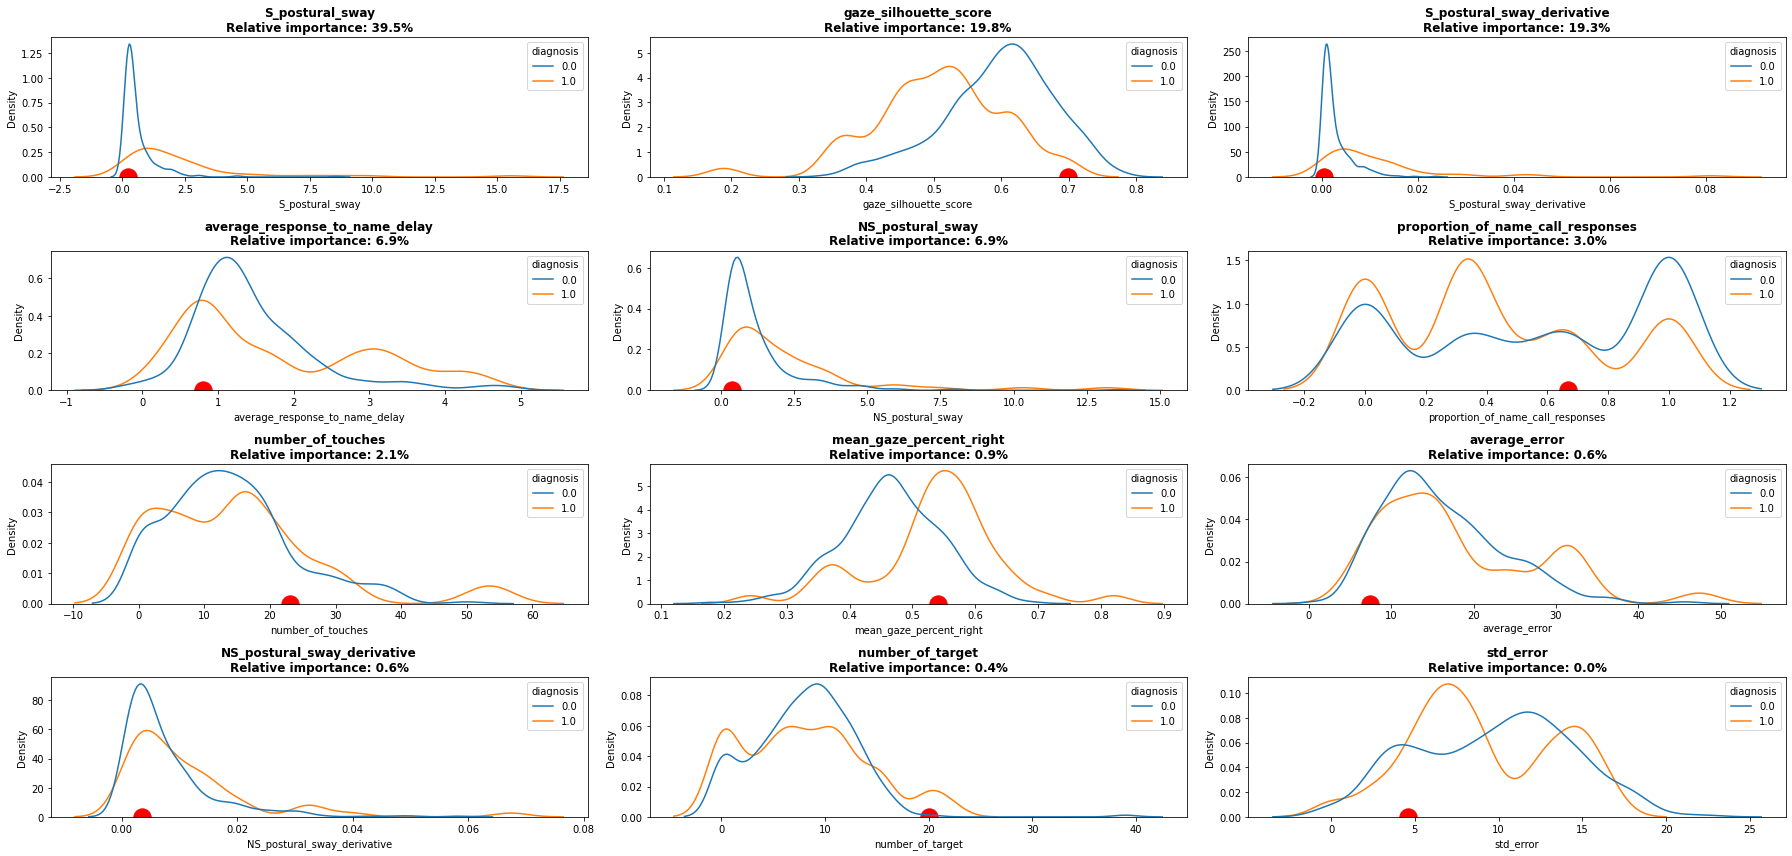

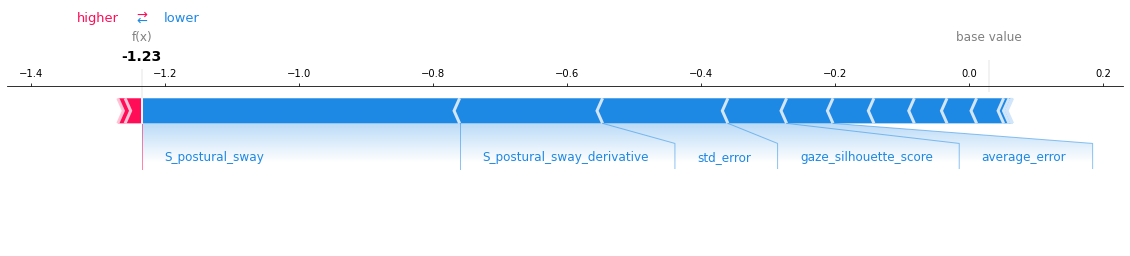

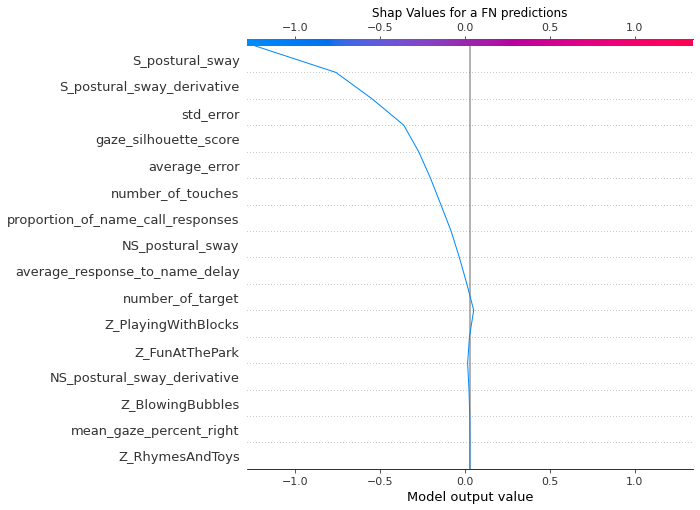

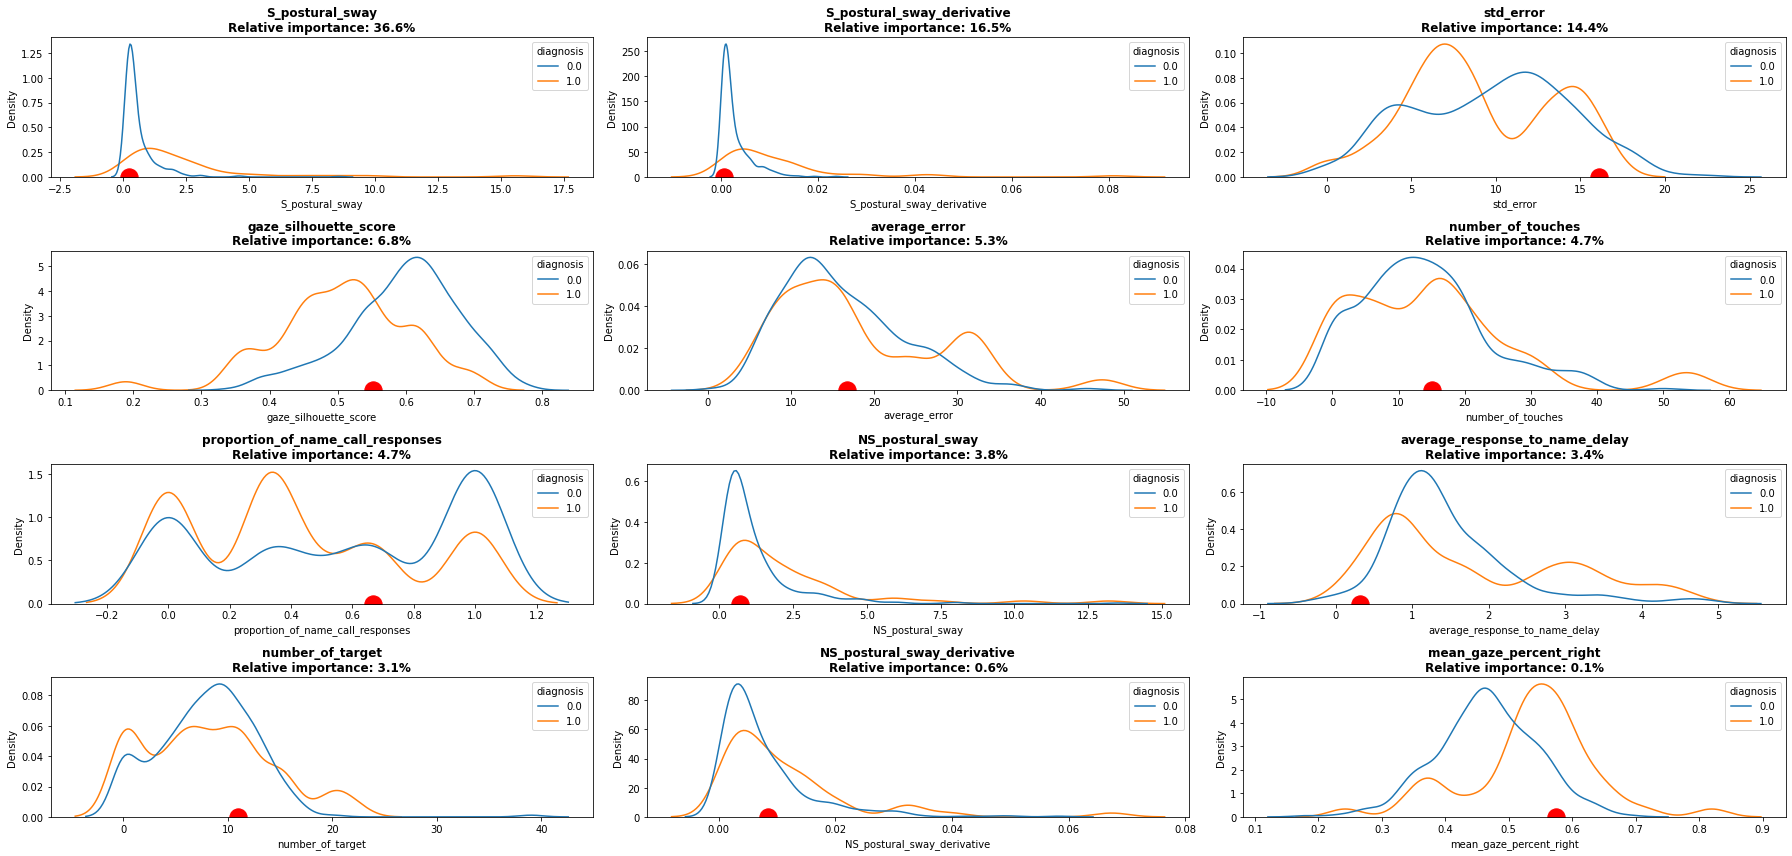

In [267]:
import shap
name = 'FN'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[:2]
for idx in index_samples:
    plot_summary_sample(exp, idx, name)

## False Negative examples

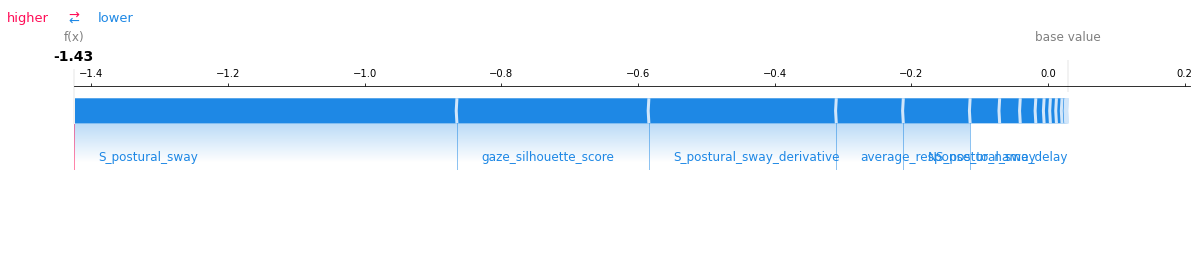

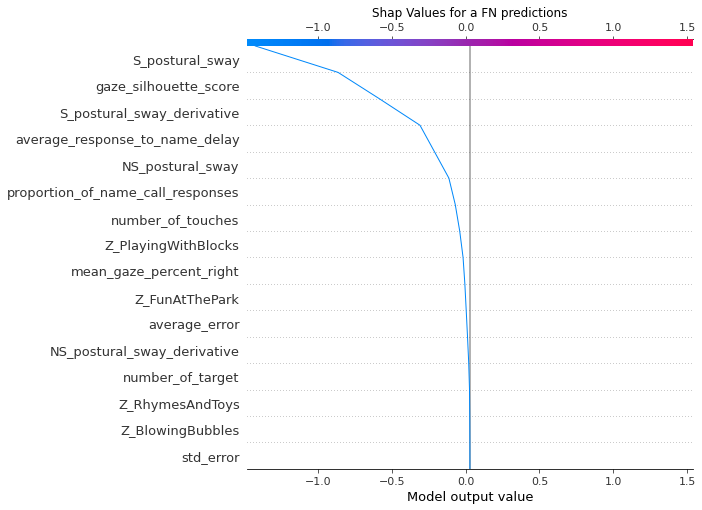

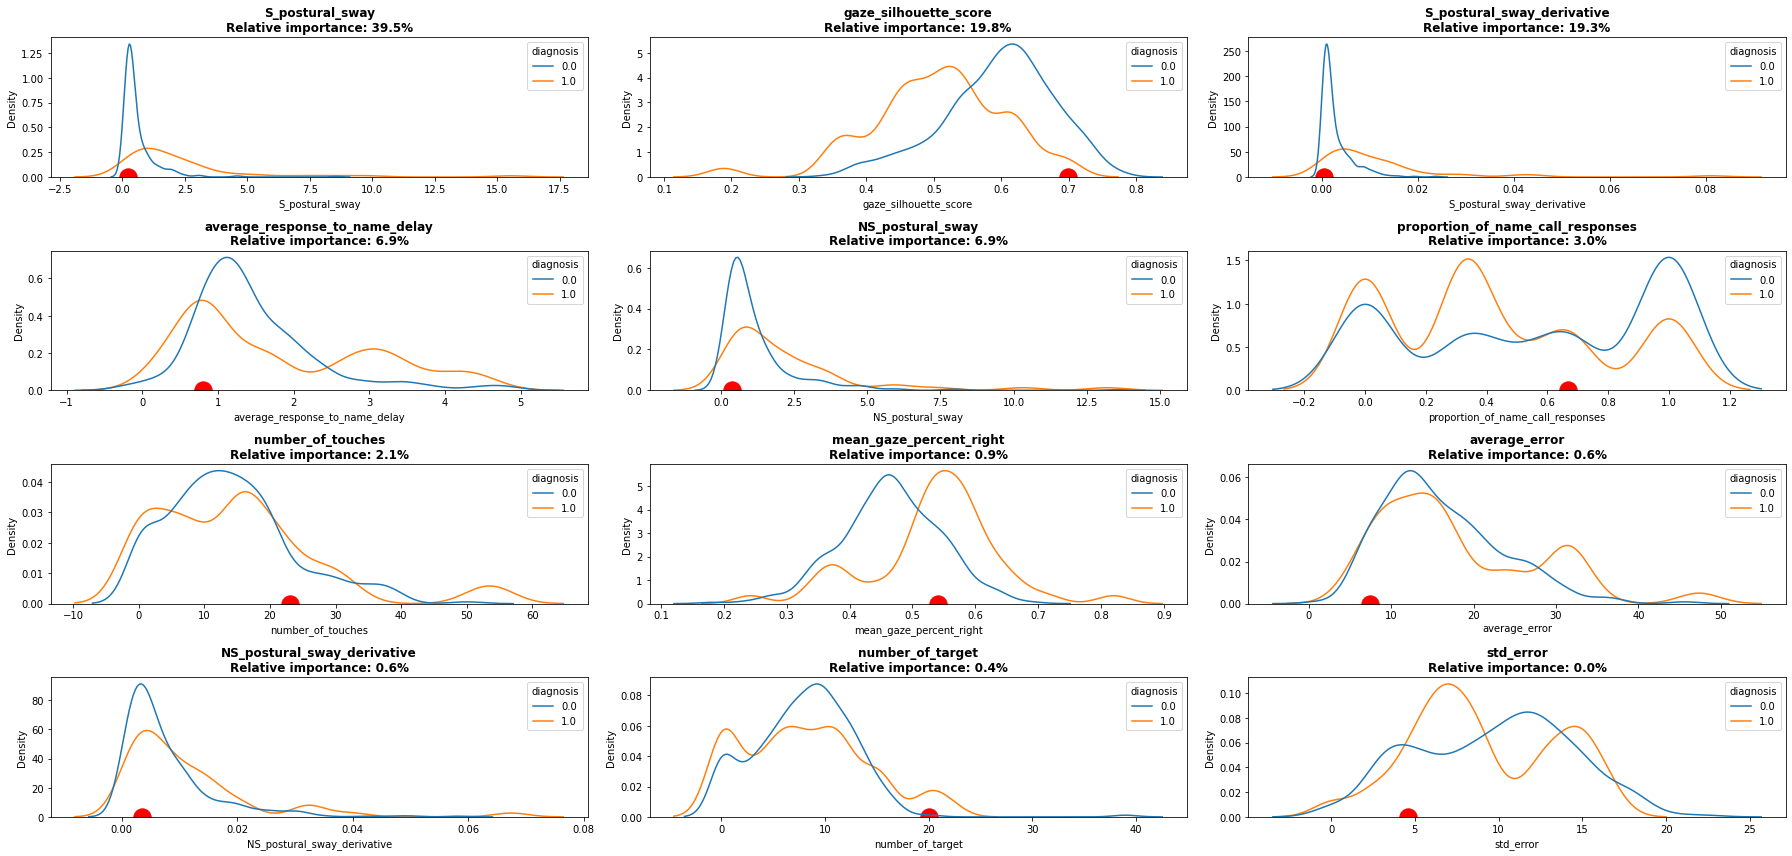

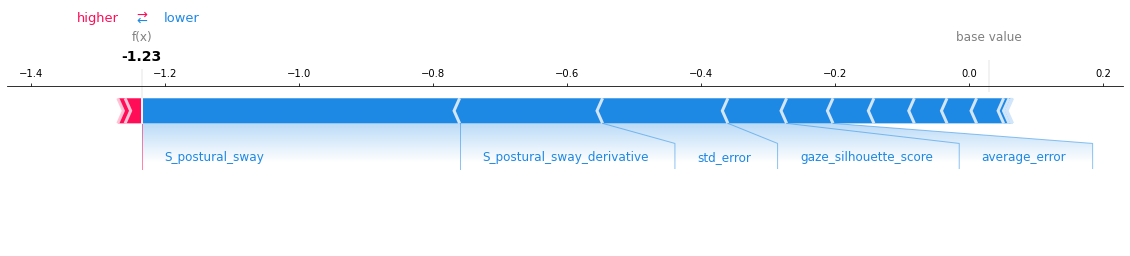

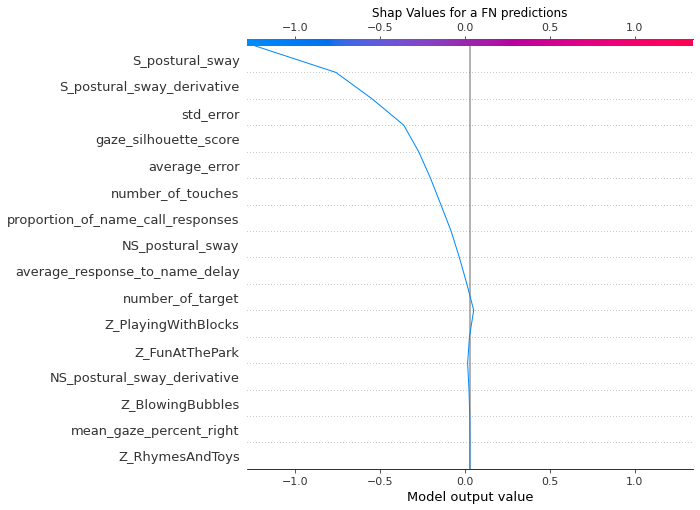

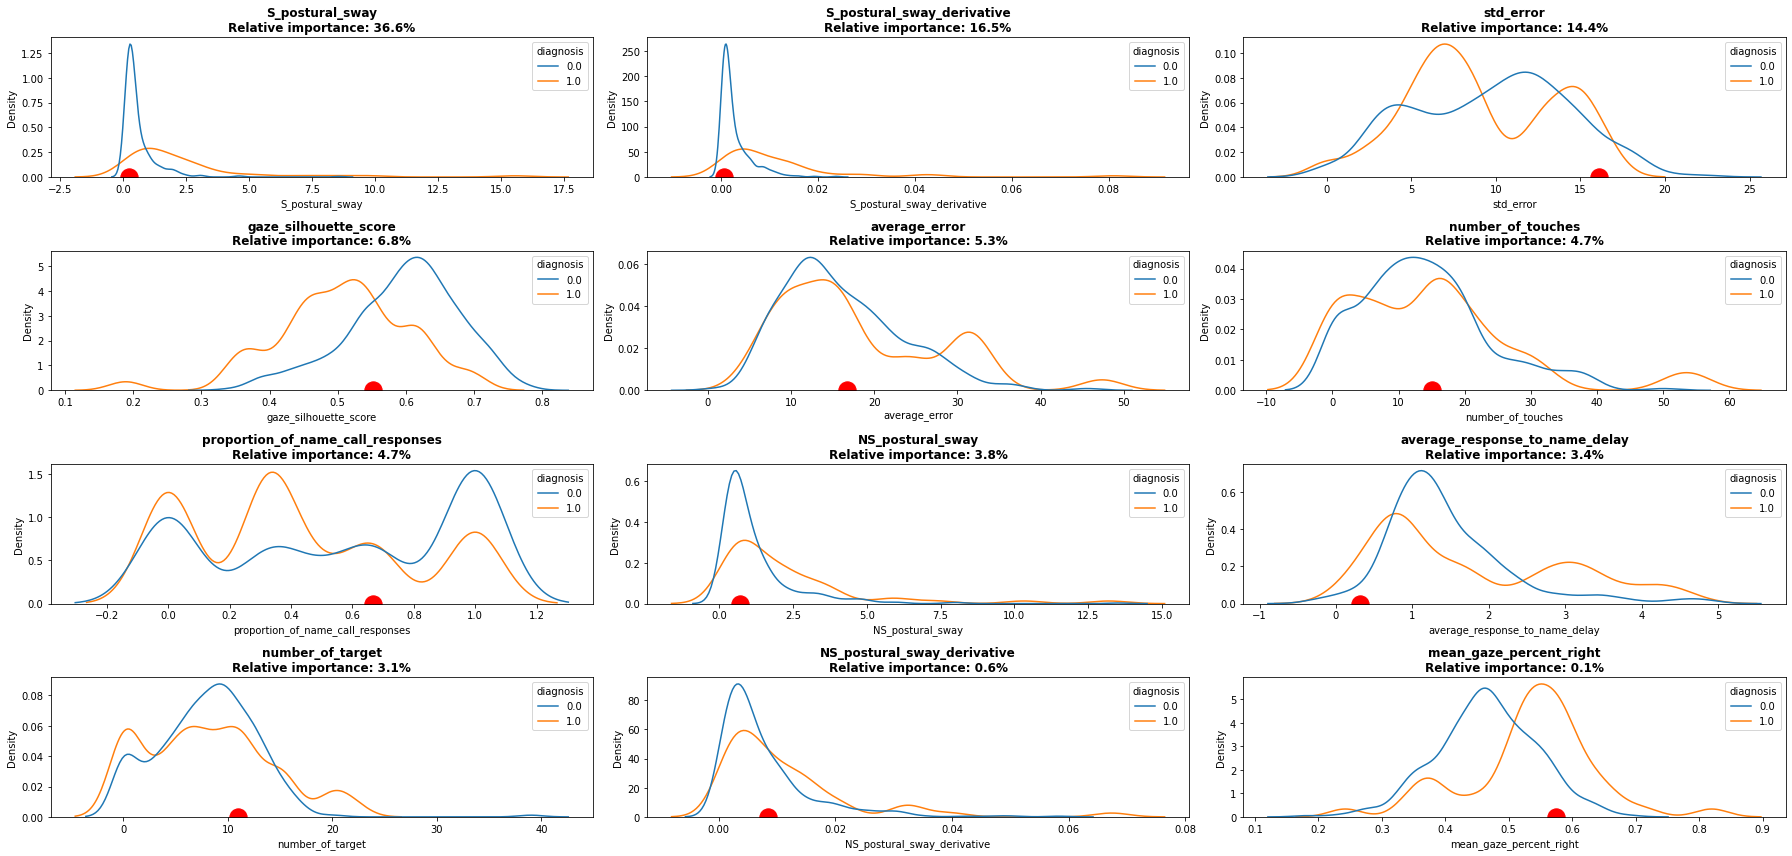

In [260]:
import shap
name = 'FN'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[:2]
for idx in index_samples:
    plot_summary_sample(exp, idx, name)

## False Positive examples

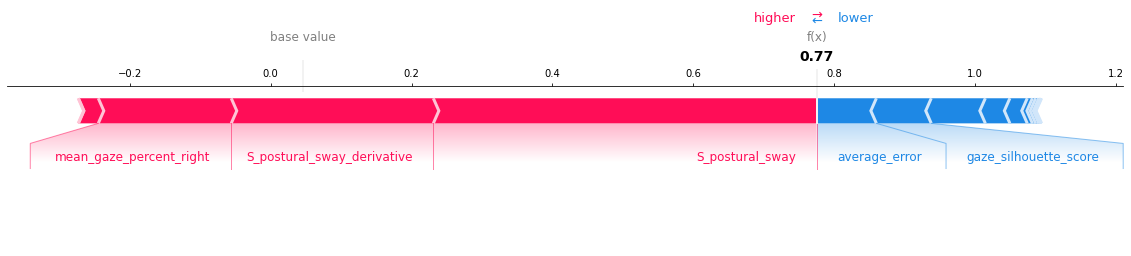

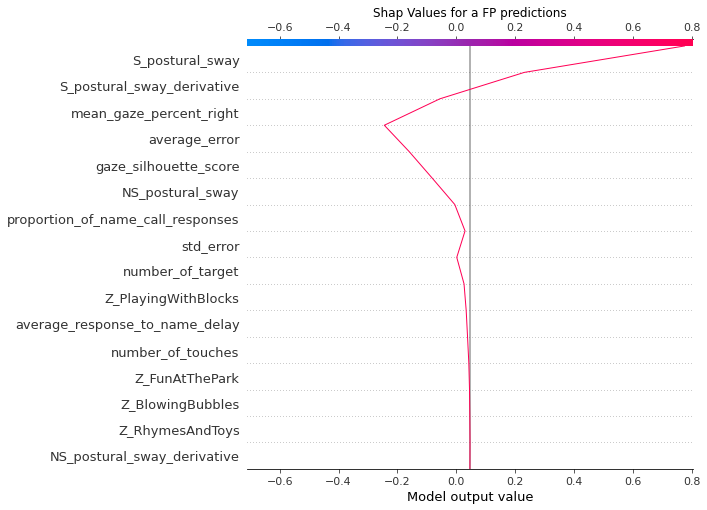

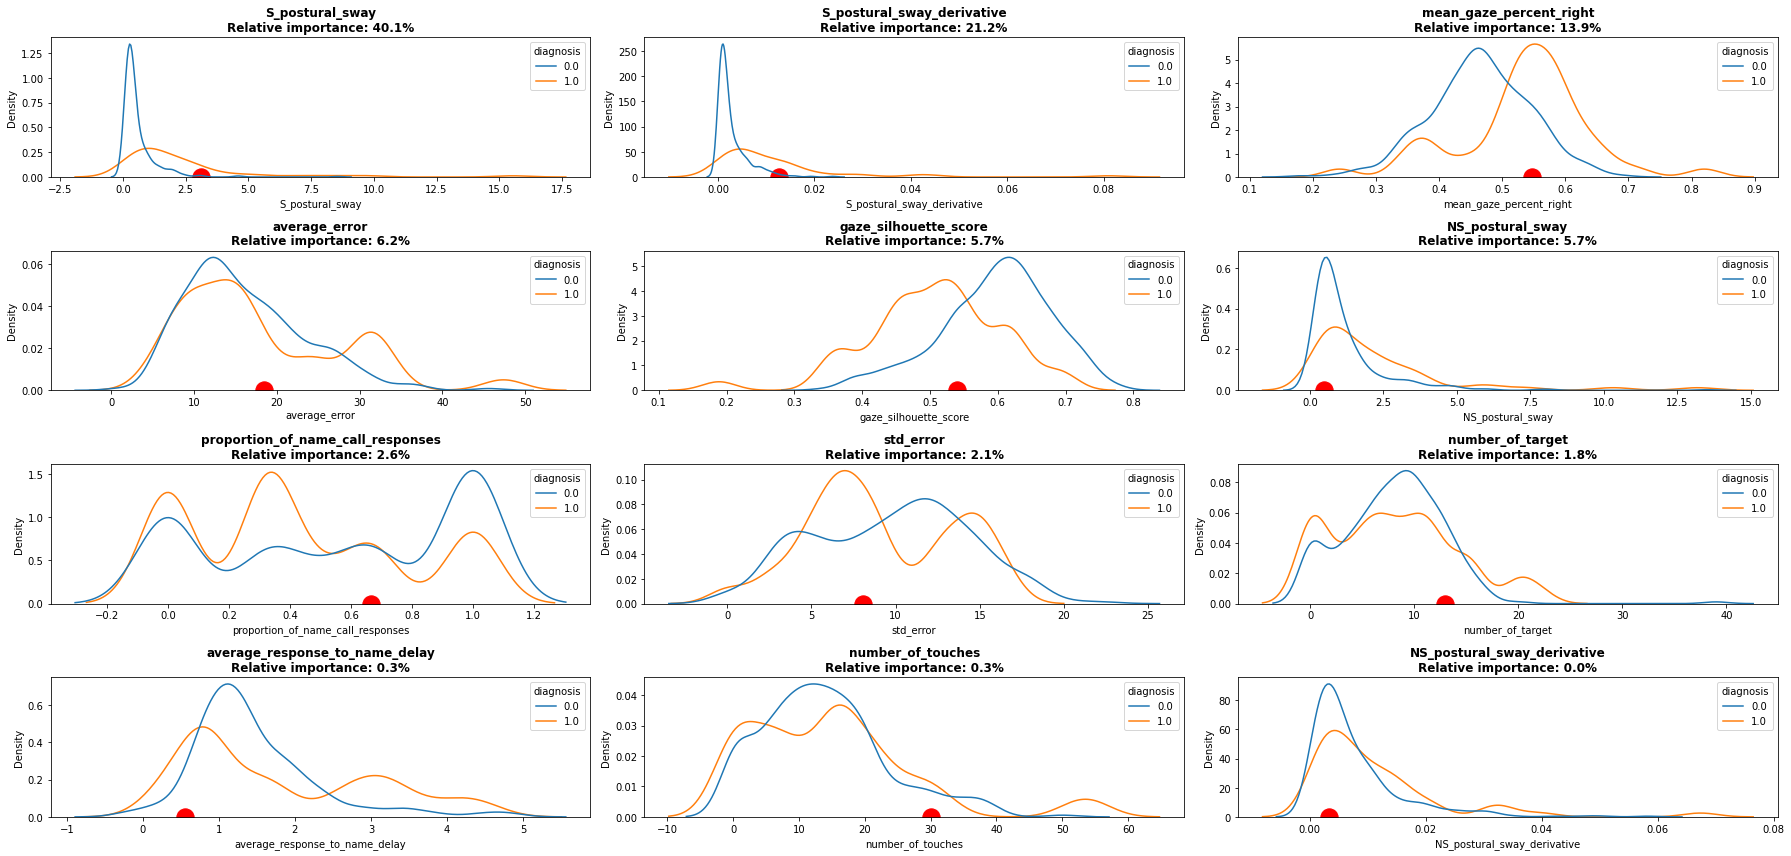

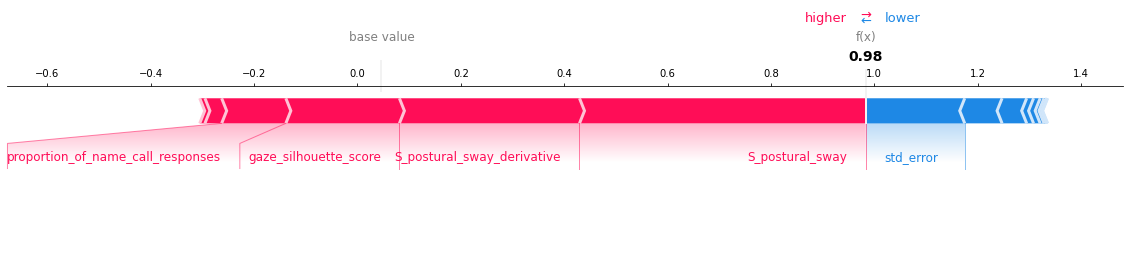

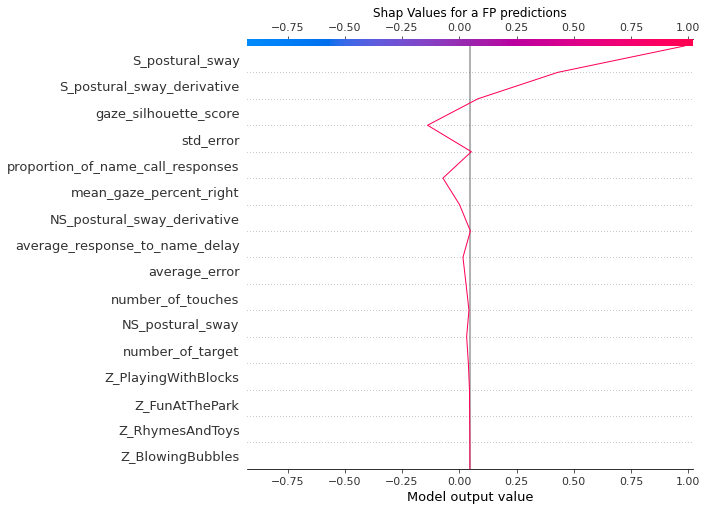

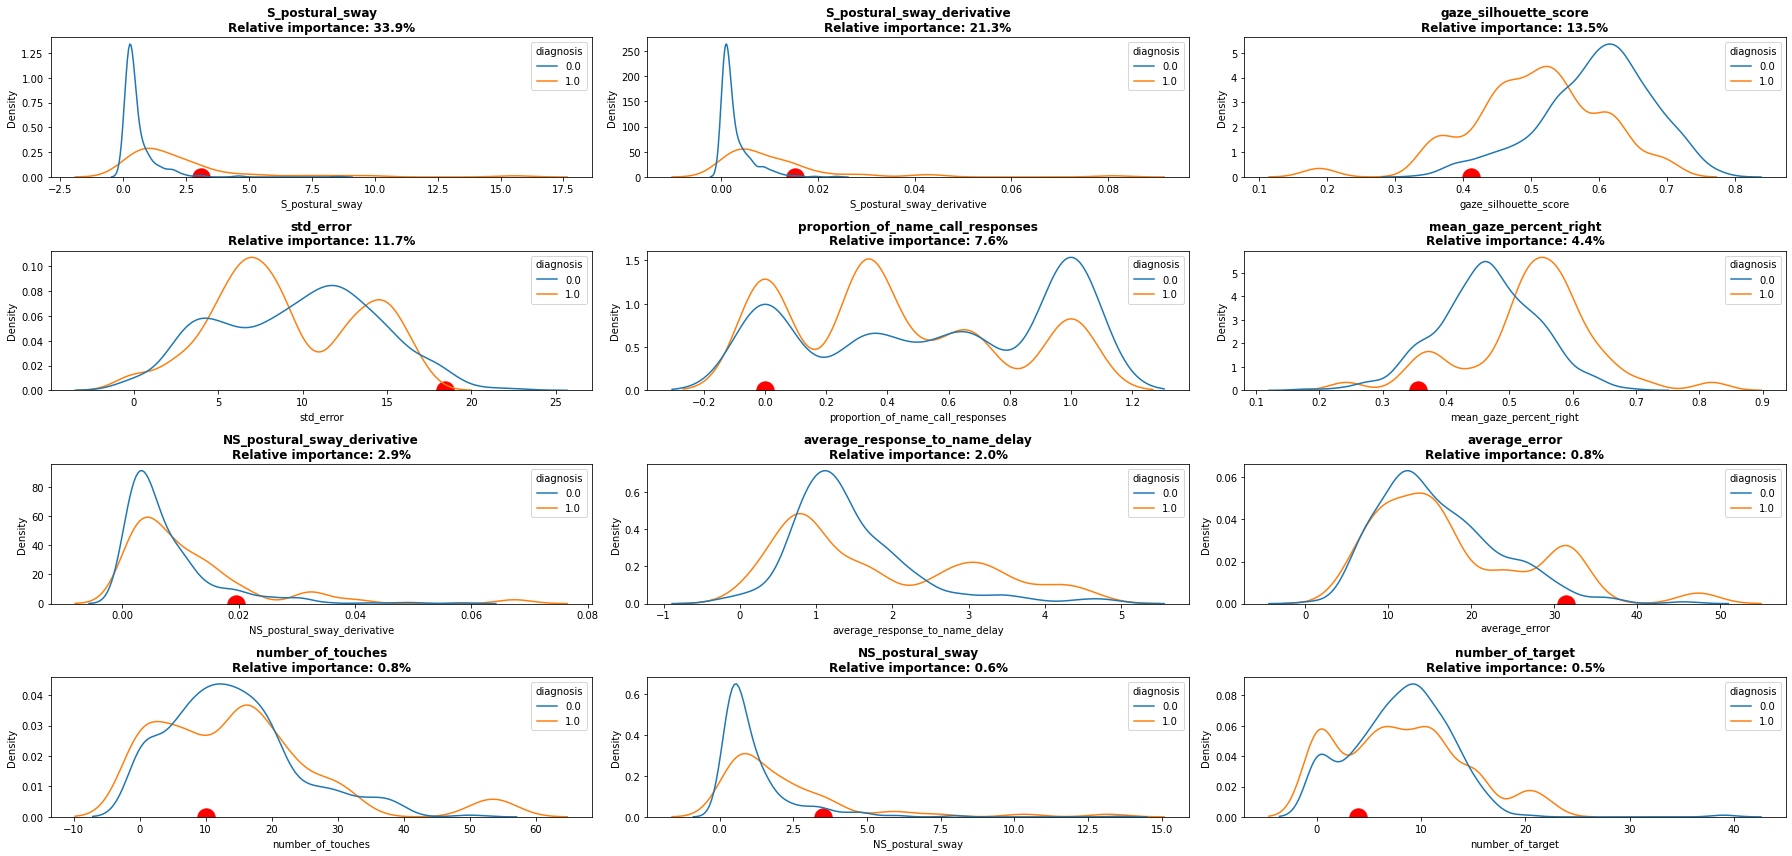

In [262]:
import shap
name = 'FP'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[-2:]

for idx in index_samples:
    plot_summary_sample(exp, idx, name)

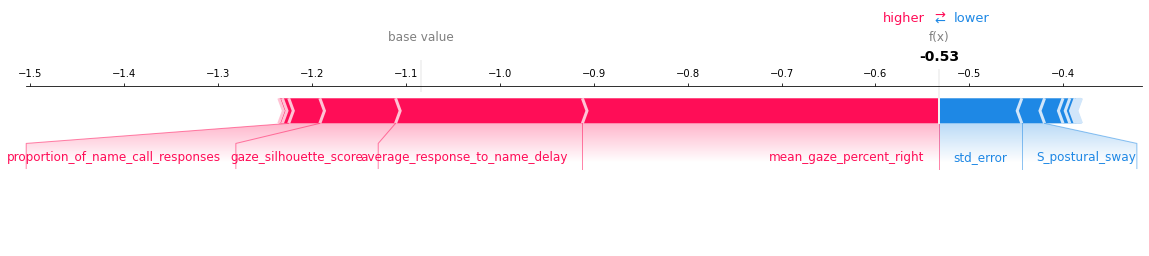

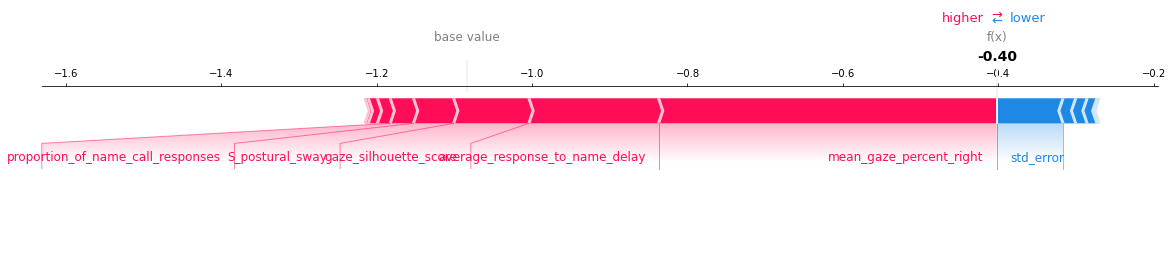

-0.5324773

In [30]:
index  = np.array(list(exp.predictions_df[exp.predictions_df['FP']==1].index))
idx = np.random.choice(index, 1)
features = exp.predictions_df[exp.features_name]

shap_values_fit_all = explainer.shap_values(features)[idx]
expected_value_fit_all = explainer.expected_value


shap_value_individual = exp.shap_values[idx]
expected_value_individual =  exp.models_expected_value[idx]

shap.force_plot(expected_value_fit_all, shap_values_fit_all, feature_names=exp.features_name, matplotlib=True)

shap.force_plot(expected_value_individual, shap_value_individual, feature_names=exp.features_name, matplotlib=True)

shap_values_fit_all.sum() + expected_value_fit_all




In [15]:
expected_value_fit_all

array([-1.08467424])

In [6]:
exp.shap_values[0].sum() + exp.models_expected_value[0]

-1.40382281615166

In [8]:
exp.dataset.X_train.shape

(467, 16)

## Experiment 6. `n_features`

In [24]:
for feature_scenario in DEFAULT_PREDICTORS_BY_TYPES.keys():
    
    df =  pd.read_csv(AUTISM_DATA_PATH)

    data = Dataset(df=df, 
                   missing_data_handling='imputation',
                   imputation_method='constant',
                   sampling_method='without',
                   scenario = 'multimodal_2023', 
                   features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES[feature_scenario]),
                   scale_data=False, 
                   use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS_BY_TYPES[feature_scenario],
                   verbosity=1, 
                   proportion_train=1)

    exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach=approach, 
                      previous_experiment=None,        
                      debug=False, 
                      experiment_folder_name='13_november_scale_pos_weight', 
                      experiment_name = 'Multimodal {}'.format(feature_scenario),
                      verbosity=0, 
                      save_experiment=True)
    
    exp.fit_predict(num_cv='loocv')
    print(feature_scenario)
    display(exp.performances_df)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Gaze


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal Gaze  0.773   0.343        0.801             0.128                  0.936                           0.409               0.197     0.882                                   0.345                                               0.38                                                       0.942                                            0.442                                              0.133                                 0.927                                    0.62                             0.558                            0.073  19  393  24  31

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

RTN


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN   FP  FN
0  Multimodal RTN  0.595   0.143        0.336             0.032                  0.403                           0.246                0.08     0.448                                   0.154                                               0.84                                                         0.4                                            0.144                                              0.032                                 0.954                                    0.16                             0.856                            0.046  42  167  250   8

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

PosturalSway


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal PosturalSway   0.78   0.352        0.865             0.115                  0.874                           0.425               0.262     0.901                                   0.389                                               0.34                                                       0.969                                            0.567                                              0.202                                 0.924                                    0.66                             0.433                            0.076  17  404  13  33

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Touch


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal Touch  0.504   0.116        0.073             0.025                   0.27                            0.22               0.072     0.788                                   0.107                                               0.28                                                       0.849                                            0.182                                              0.041                                 0.908                                    0.72                             0.818                            0.092  14  354  63  36

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

All


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

All - Gaze


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All - Gaze  0.854    0.47         0.87             0.204                  0.968                           0.528               0.279     0.874                                   0.471                                               0.66                                                       0.899                                             0.44                                              0.132                                 0.957                                    0.34                              0.56                            0.043  33  375  42  17

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

All - RTN


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All - RTN  0.826   0.451          0.9             0.184                  0.958                            0.49               0.297     0.893                                    0.43                                               0.48                                                       0.942                                              0.5                                              0.162                                 0.938                                    0.52                               0.5                            0.062  24  393  24  26

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

All - PosturalSway


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All - PosturalSway  0.802    0.34        0.795             0.109                  0.888                           0.415               0.174     0.801                                   0.349                                               0.66                                                       0.818                                            0.303                                              0.078                                 0.953                                    0.34                             0.697                            0.047  33  341  76  17

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

All - Touch


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All - Touch  0.869    0.47        0.904             0.178                  0.946                             0.5               0.254      0.88                                   0.436                                               0.56                                                       0.918                                            0.452                                              0.138                                 0.946                                    0.44                             0.548                            0.054  28  383  34  22

# Exploration of which of hte touch features are the best 

In [11]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='constant', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

In [12]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None,#7,#5,#4,#None,#3,    
                    experiment_folder_name = 'November 2022',
                    experiment_name = 'test',
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False)
exp.fit_predict(num_cv='loocv')#num_cv='loocv')#num_cv='loocv')

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0            test  0.852   0.436        0.872             0.145                  0.927                           0.505               0.316     0.891                                   0.444                                               0.52                                                       0.935                                            0.491                                              0.157                                 0.942                                    0.48                             0.509                            0.058  26  390  27  24

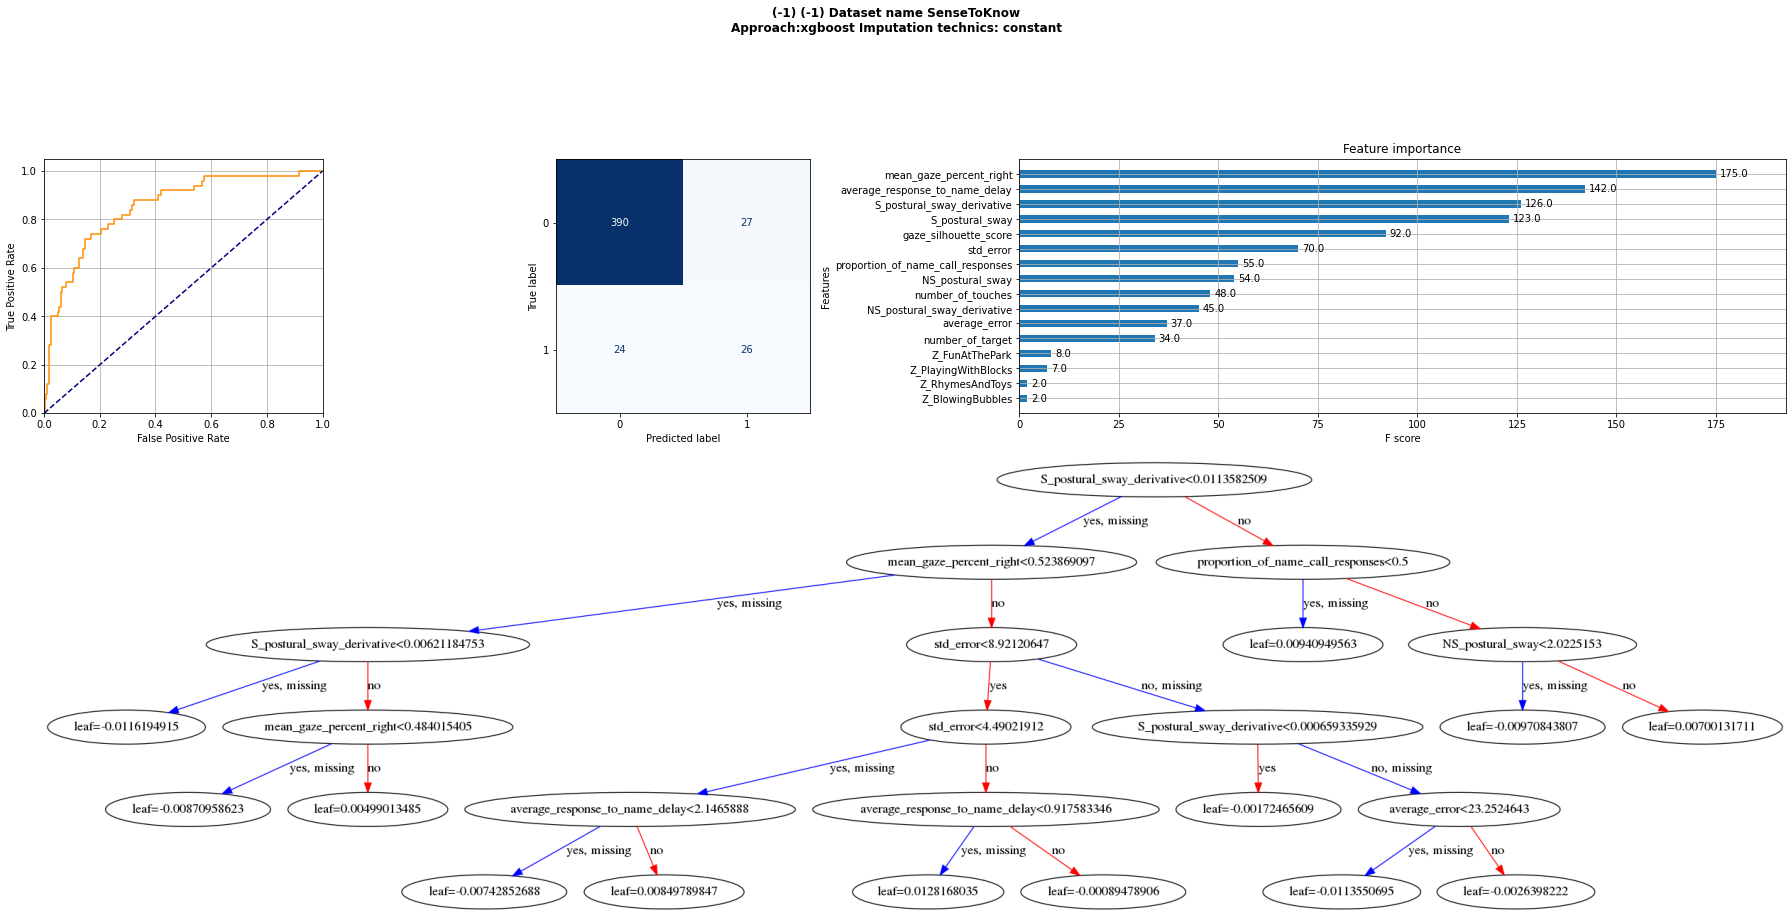

In [13]:
exp.plot()

In [16]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='constant', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

In [17]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None,#7,#5,#4,#None,#3,    
                    experiment_folder_name = 'November 2022',
                    experiment_name = 'test',
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False)
exp.fit_predict(num_cv='loocv')#num_cv='loocv')#num_cv='loocv')

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0            test  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18

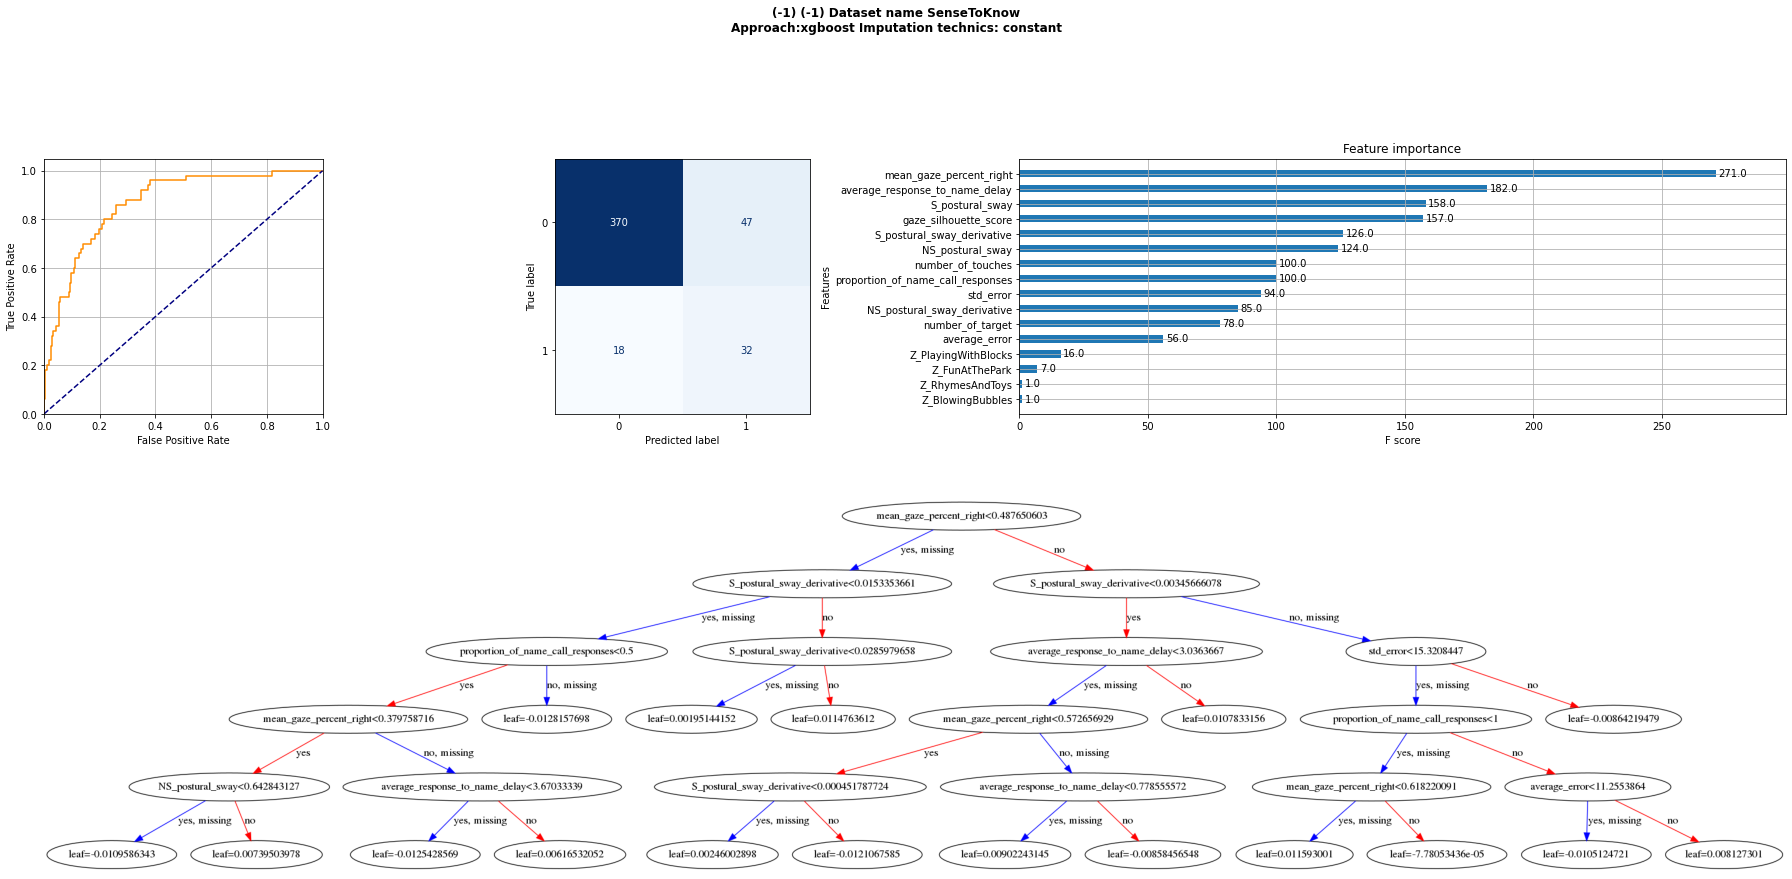

In [18]:
exp.plot()

In [13]:
deepcopy(DEFAULT_PREDICTORS_BY_TYPES[feature_scenario]),
f = ['std_length','average_error','average_delay_to_pop']

(['average_length',
  'std_length',
  'average_error',
  'pop_rate',
  'average_delay_to_pop',
  'average_time_spent'],)

In [18]:
feature_scenario = 'Touch'

df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
           missing_data_handling='encoding',
           imputation_method='without',
           sampling_method=sampling_method,
           scenario = 'multimodal_2023', 
           features_name = ['std_force_applied',
                             'average_delay_to_pop',
                            'std_length',
                            'number_of_target',
                            'average_error'],#deepcopy(DEFAULT_PREDICTORS_BY_TYPES[feature_scenario]),
           scale_data=False, 
           use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS_BY_TYPES[feature_scenario],
           verbosity=1, 
           proportion_train=1)

exp = Experiments(data.dataset_name,
              dataset=data, 
              approach=approach, 
              previous_experiment=None,        
              debug=False, 
              experiment_folder_name='November 2022', 
              experiment_name = 'Multimodal {}'.format(feature_scenario),
              verbosity=0, 
              save_experiment=False)

exp.fit_predict(num_cv='loocv')

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal Touch  0.553   0.143        0.266             0.032                  0.598                           0.222               0.076     0.805                                   0.115                                               0.26                                                       0.871                                            0.194                                              0.045                                 0.908                                    0.74                             0.806                            0.093  13  363  54  37

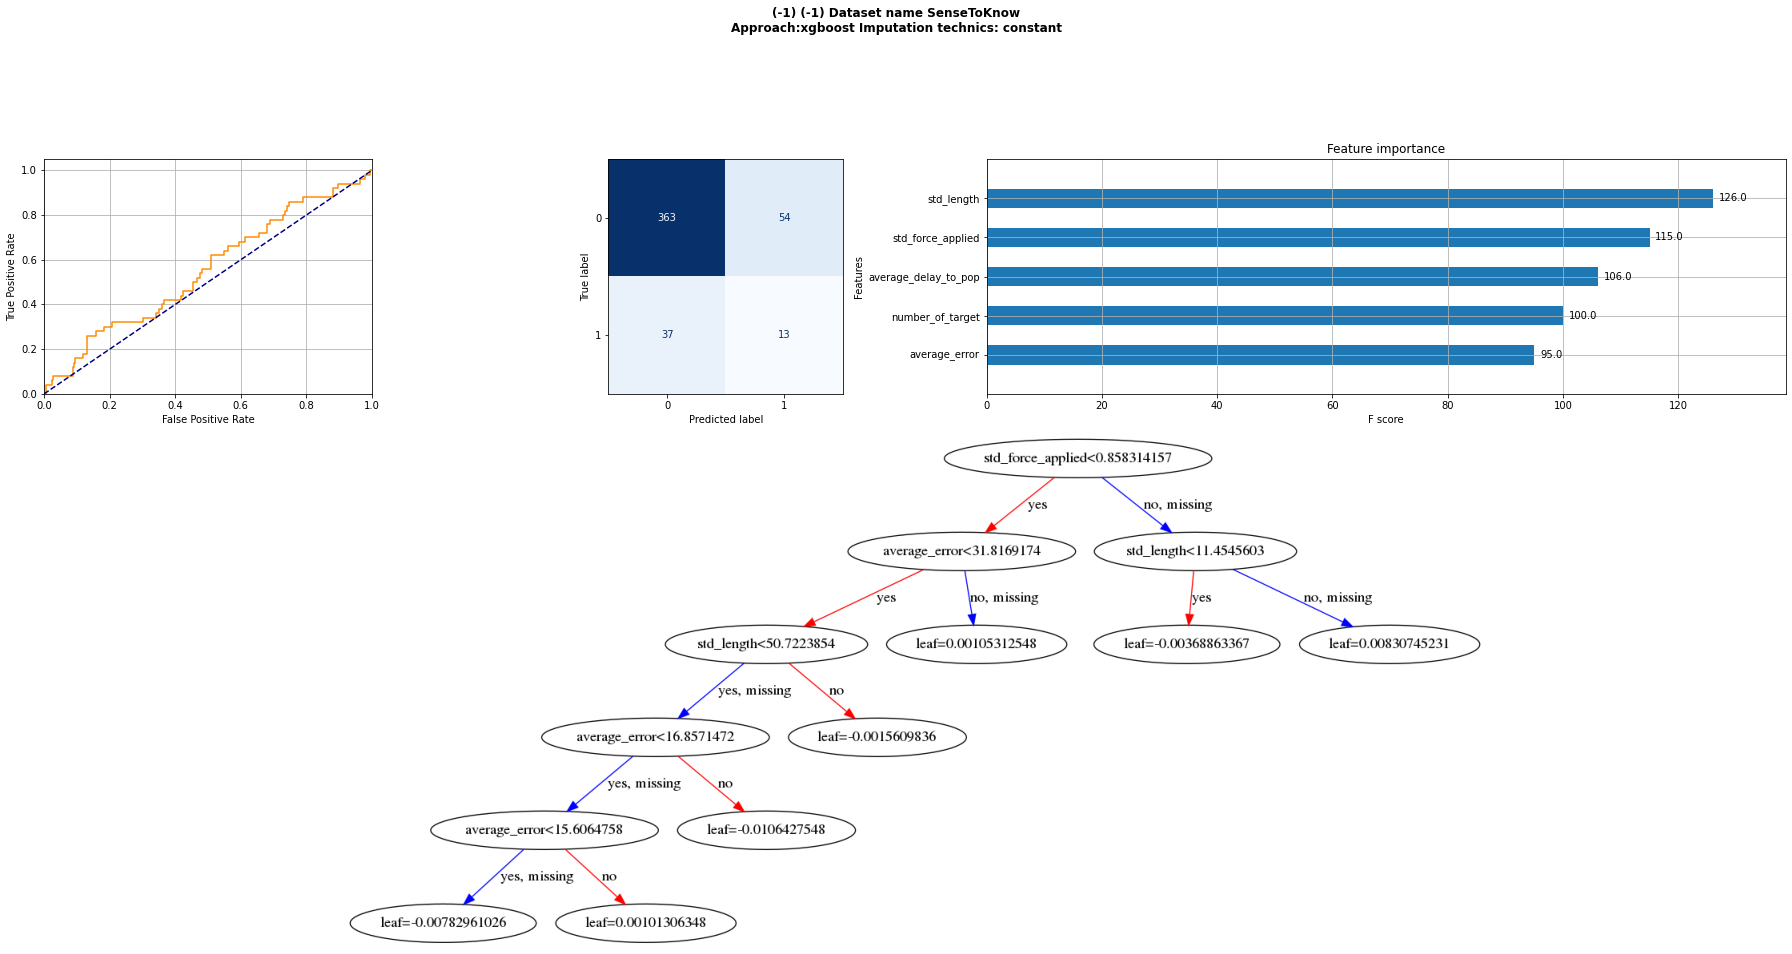

In [19]:
exp.plot()

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN   FP  FN
0  Multimodal Touch  0.507    0.12        0.083             0.026                  0.447                           0.205               0.063     0.218                                   0.067                                               0.94                                                       0.132                                            0.115                                              0.025                                 0.948                                    0.06                             0.885                            0.052  47  55  362   3

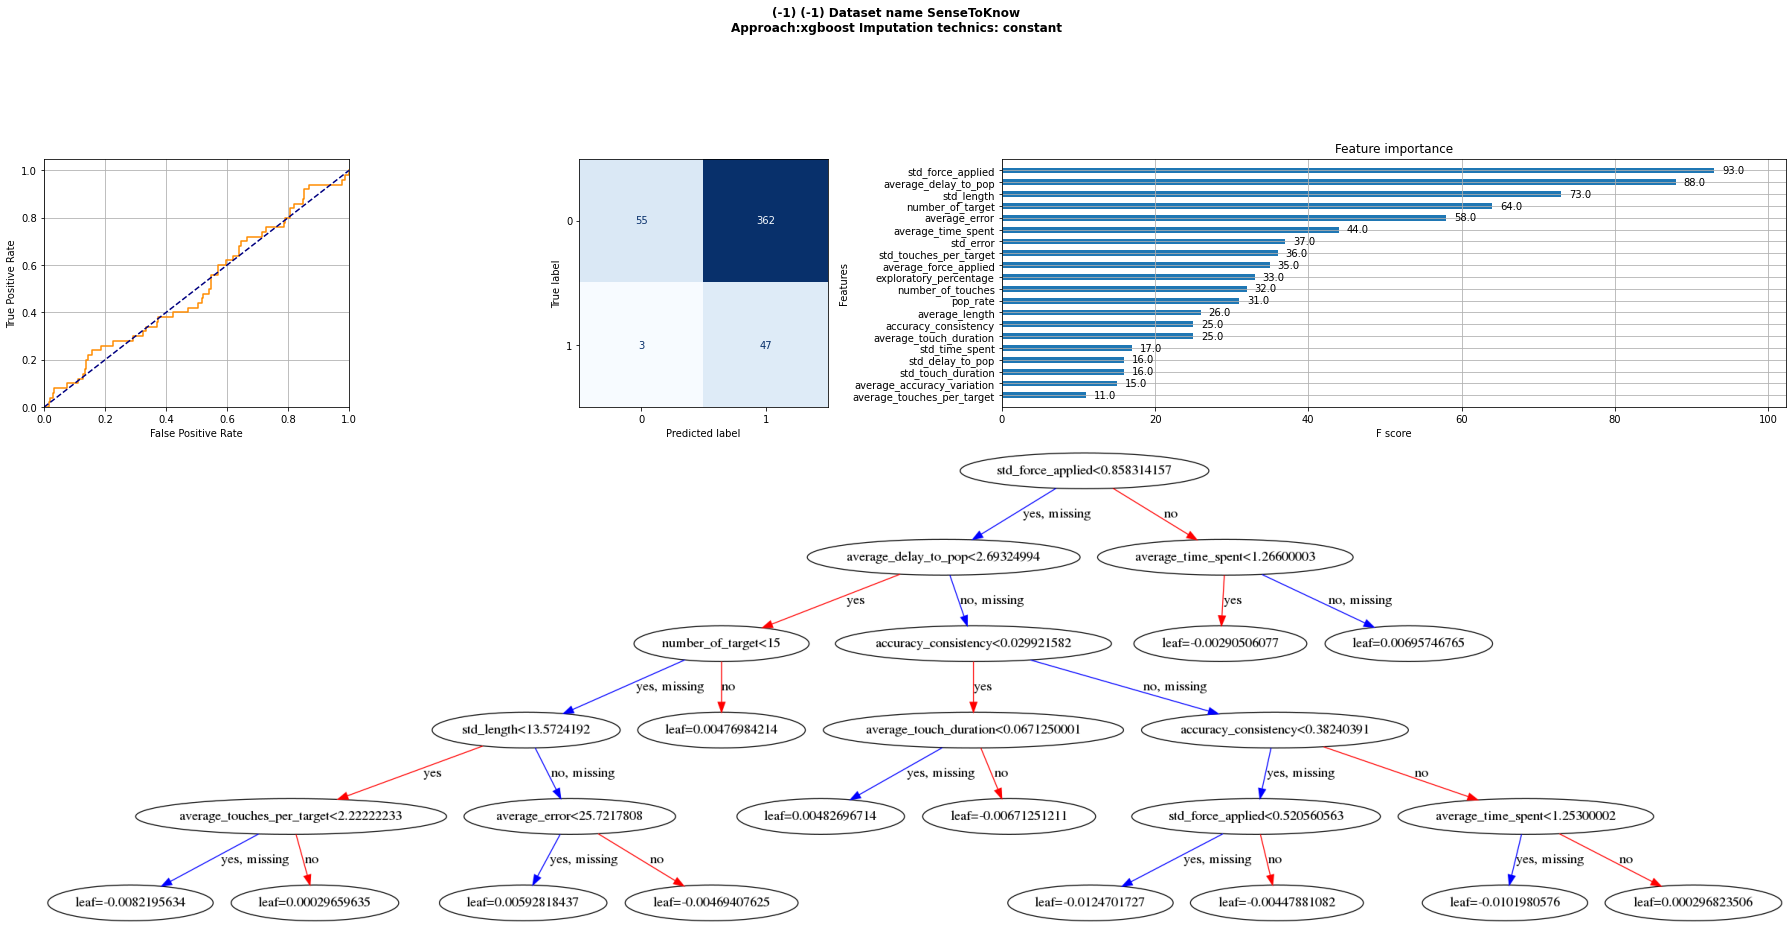

In [17]:
exp.plot()

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN   FP  FN
0  Multimodal Touch  0.528   0.152        0.279             0.036                   0.72                           0.212               0.104     0.458                                    0.07                                               0.68                                                       0.432                                            0.125                                              0.027                                 0.918                                    0.32                             0.875                            0.082  34  180  237  16

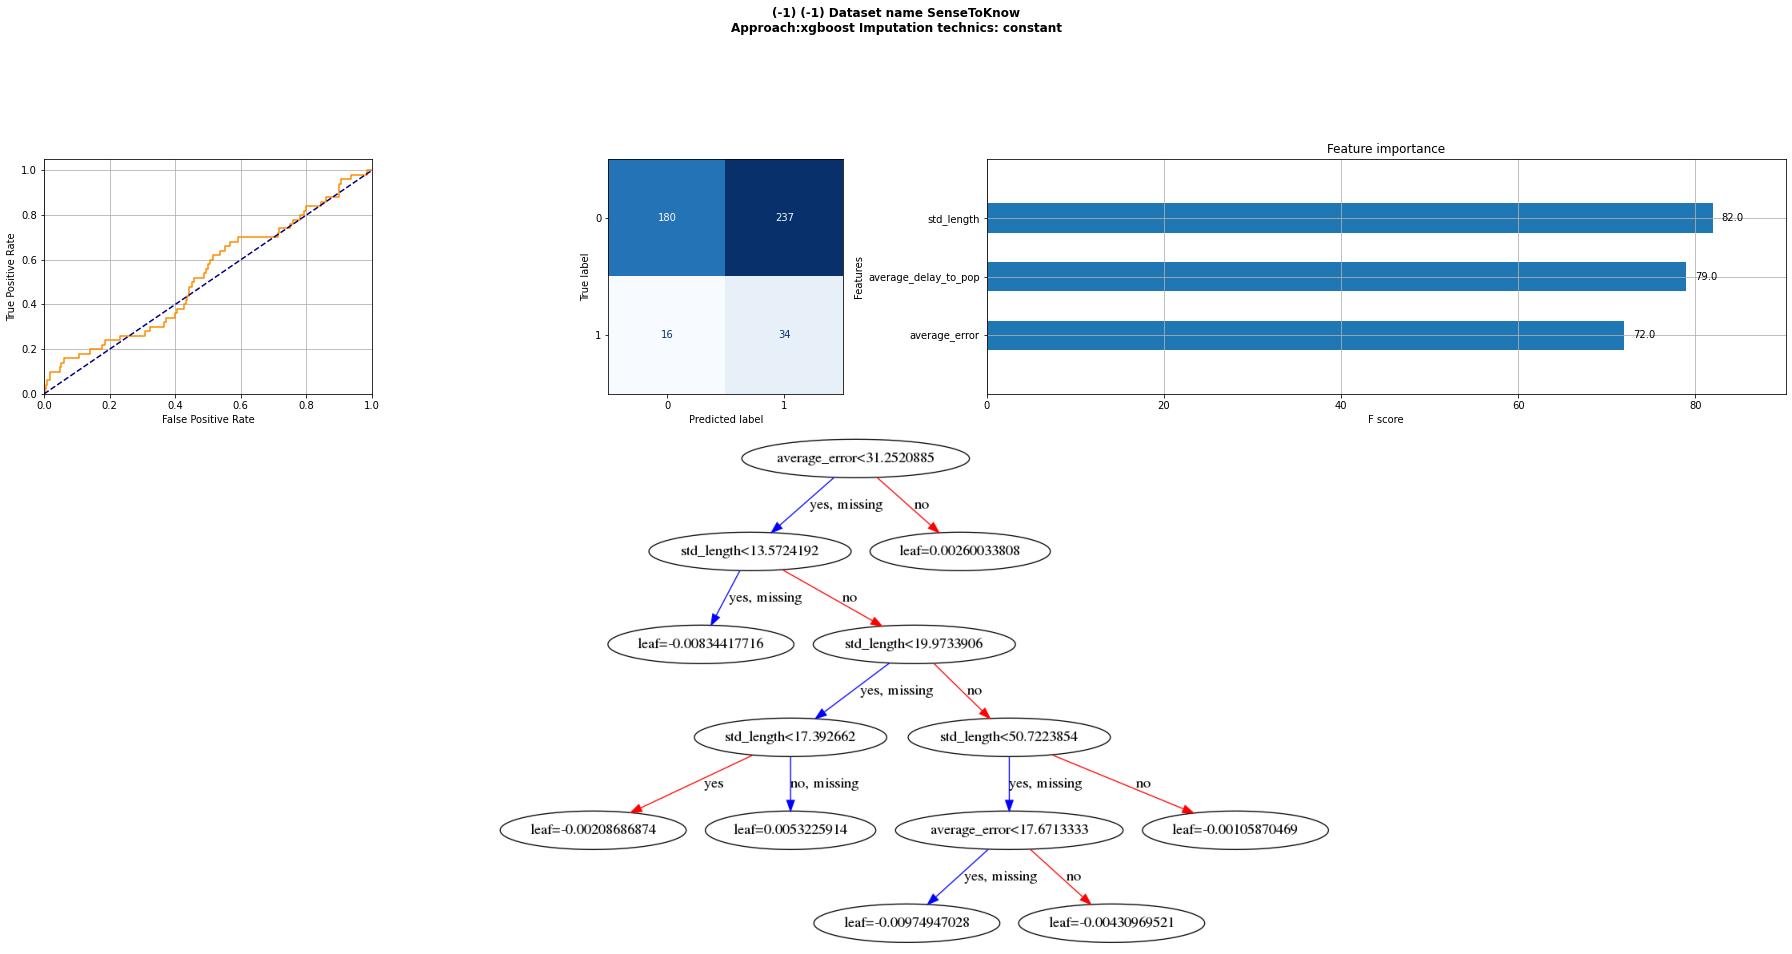

In [15]:
exp.plot()

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN   FP  FN
0  Multimodal Touch  0.528   0.126        0.093             0.028                  0.261                           0.219               0.054     0.467                                   0.087                                                0.7                                                       0.439                                             0.13                                              0.028                                 0.924                                     0.3                              0.87                            0.076  35  183  234  15

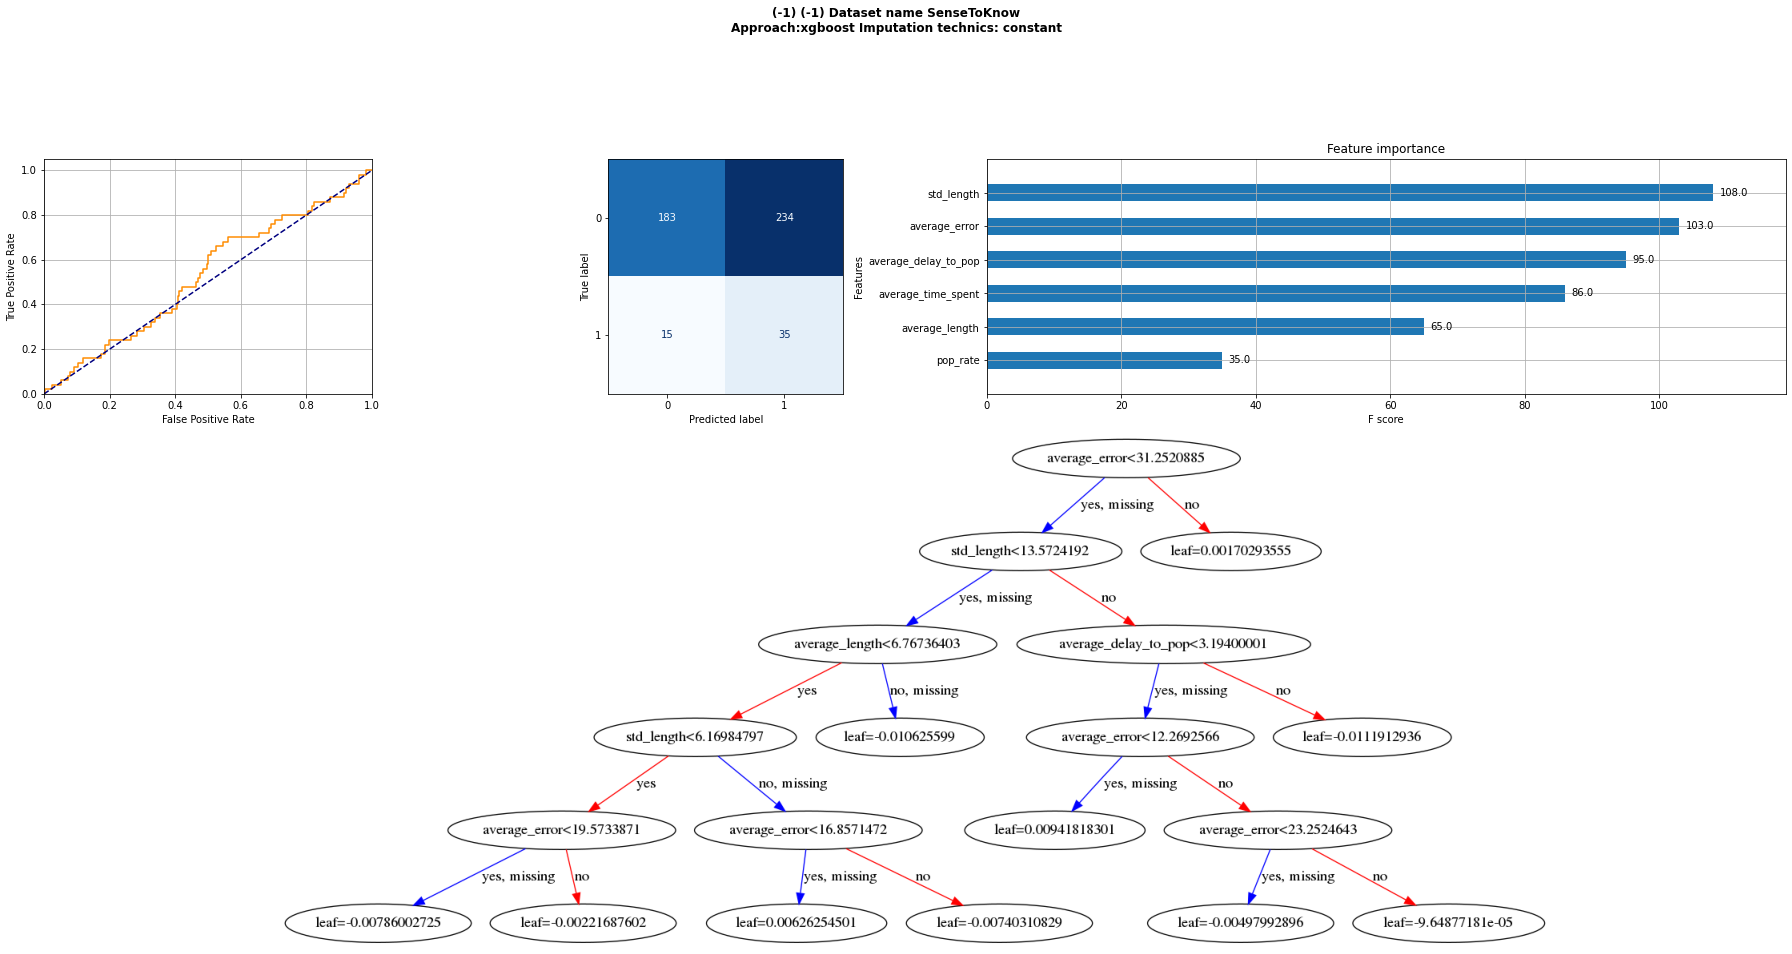

In [10]:
exp.plot()

## Experiment 6. `n_features`

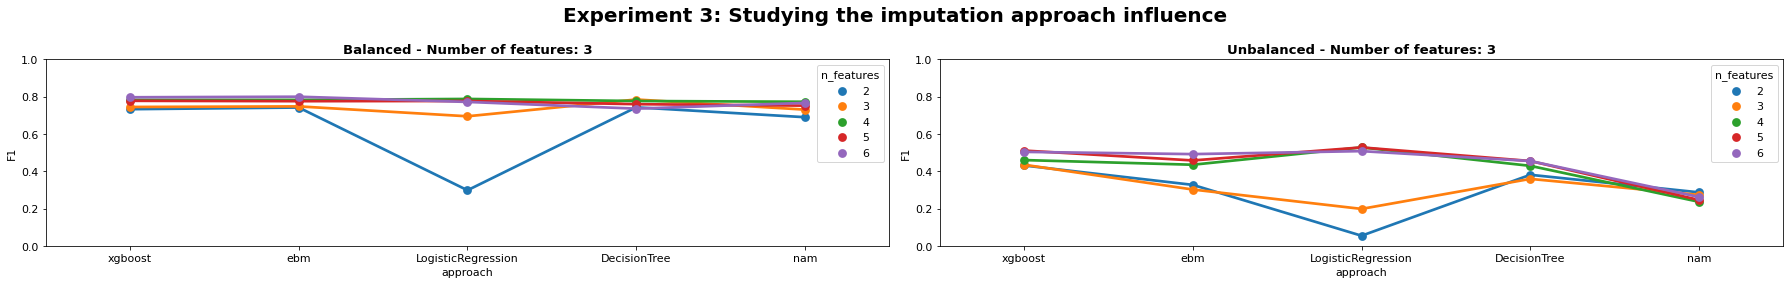

In [247]:

fig, axes = plt.subplots(1, 2, figsize=(25, 4));axes = axes[np.newaxis, :]
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

i=0
for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

    results = df[(df['missing_data_handling'] == 'encoding') &
                 (df['use_missing_indicator_variables'] == False) &
                 (df['scale_data'] == True) &
                 (df['num_cv'] == 16) &
                 (df['sampling_method'] == 'without') &
                 (df['scenario'] == scenario)]

    assert len(results) == 5*5

    axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='n_features', ci='sd', ax = axes[i][j])
    axes[i][j].set_ylim([0,1])
    axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

plt.tight_layout()

## Experiment 7. `approach`

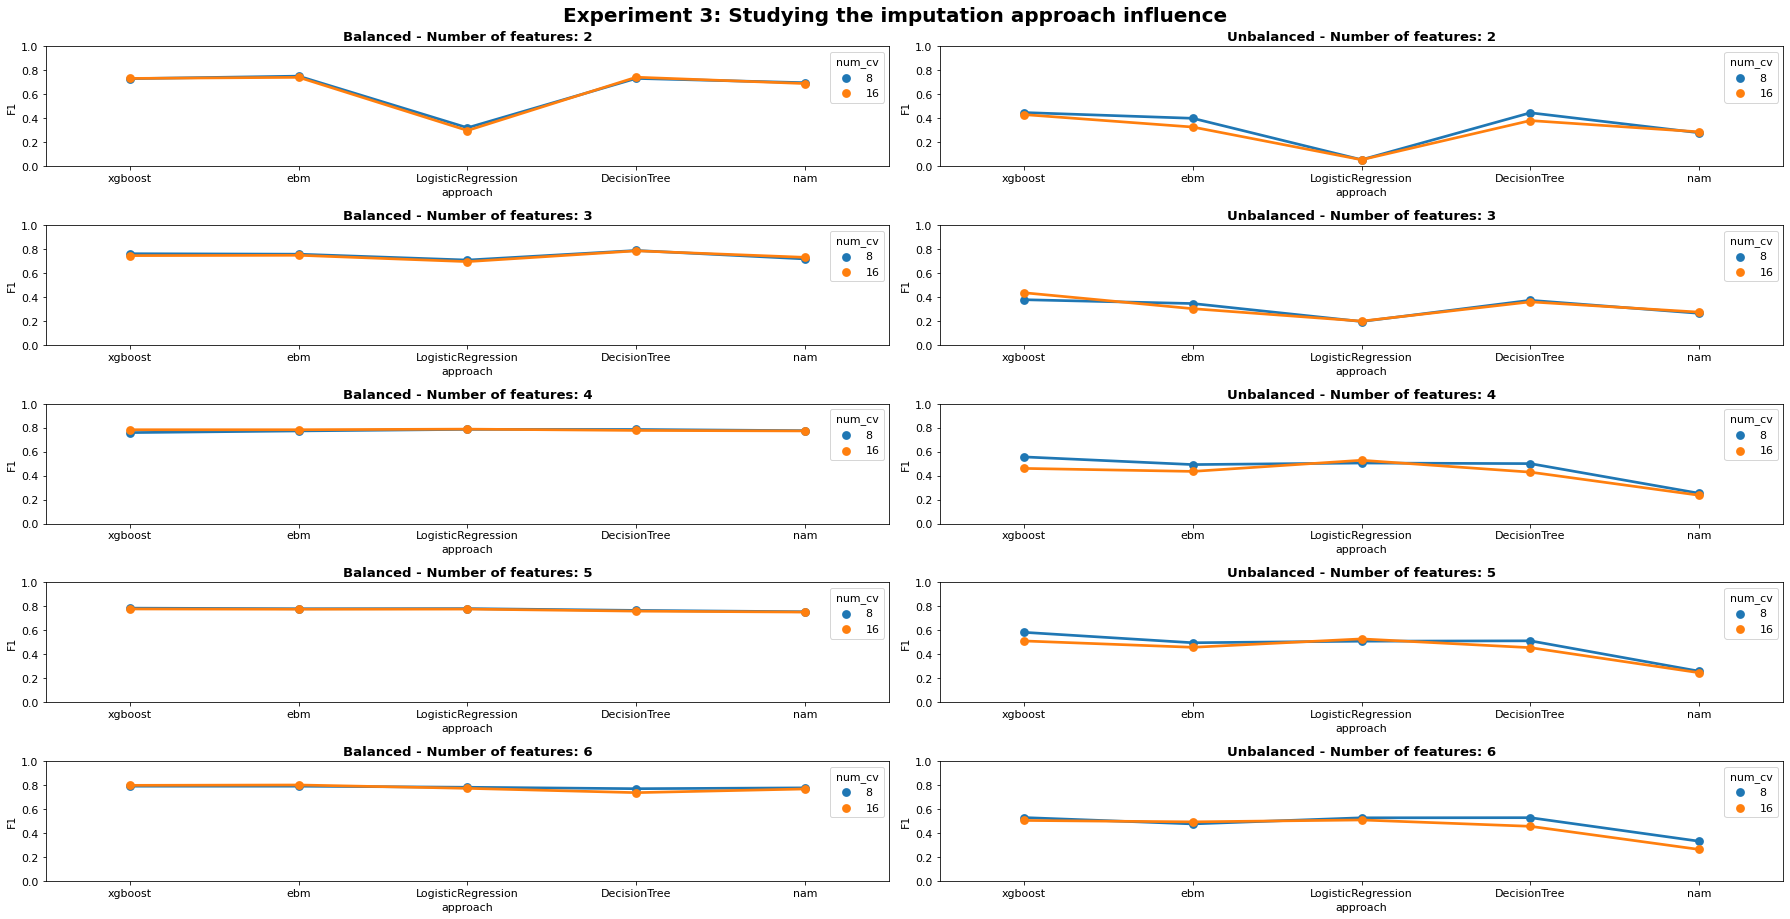

In [248]:
fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        
        assert len(results) == 5*2

        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='num_cv', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

In [255]:
df.sort_values(by='F1')

for scenario, results in df.groupby('scenario'):
    print("\n\n\nScenatio: {}".format(scenario))
    display(results.sort_values(by=['F1'], ascending = False).head(10))




Scenatio: asd_td_age_matched_n_balanced


dataset_name  experiment_number approach missing_data_handling imputation_method                                      features_name  n_features  use_missing_indicator_variables  scale_data sampling_method                       scenario  num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1  resolution  bandwidth  estimation_time  num_cv  auc  Accuracy     F1    MCC  Sensitivity  Specificity  Precision    PPV    NPV    FNR    FDR    FOR
3896  complete_autism               1703  xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True           smote  asd_td_age_matched_n_balanced          237         0.926829                 0.165963                   0.098916                   0.238304          20        0.2         2.599746       8  NaN     0.819  0.817  0.639        0.842        0.797      0.793  0.793  0.845  0.158  0.207  0.155
2700  complete_autism               1503  xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True         vanilla  asd_td_age_matched_n_balanced          237         0.926829                 0.165963                   0.098916                   0.238304          20        0.2         2.667968       8  NaN     0.819  0.817  0.639        0.842        0.797      0.793  0.793  0.845  0.158  0.207  0.155
3159  complete_autism               1303  xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True         without  asd_td_age_matched_n_balanced          237         0.926829                 0.165963                   0.098916                   0.238304          20        0.2         2.613392       8  NaN     0.819  0.817  0.639        0.842        0.797      0.793  0.793  0.845  0.158  0.207  0.155
4200  complete_autism                893  xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         vanilla  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2         9.416015      16  NaN     0.814  0.814  0.631        0.842        0.789      0.787  0.787  0.843  0.158  0.213  0.157
216   complete_autism               1093  xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True           smote  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2         6.773226      16  NaN     0.814  0.814  0.631        0.842        0.789      0.787  0.787  0.843  0.158  0.213  0.157
2951  complete_autism                693  xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         without  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2         4.839285      16  NaN     0.814  0.814  0.631        0.842        0.789      0.787  0.787  0.843  0.158  0.213  0.157
4601  complete_autism                403  xgboost              encoding          constant  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True           smote  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2        13.631719       8  NaN     0.802  0.802  0.606        0.833        0.772      0.772  0.772  0.833  0.167




Scenatio: asd_td_age_matched_n_unbalanced


dataset_name  experiment_number      approach missing_data_handling imputation_method                                      features_name  n_features  use_missing_indicator_variables  scale_data sampling_method                         scenario  num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1  resolution  bandwidth  estimation_time  num_cv  auc  Accuracy     F1    MCC  Sensitivity  Specificity  Precision    PPV    NPV    FNR    FDR    FOR
3983  complete_autism                687  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         without  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007466       8  NaN     0.818  0.667  0.550        0.750        0.840      0.600  0.600  0.913  0.250  0.400  0.087
3394  complete_autism                887  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         vanilla  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007761       8  NaN     0.818  0.667  0.550        0.750        0.840      0.600  0.600  0.913  0.250  0.400  0.087
3528  complete_autism               1087  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True           smote  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007076       8  NaN     0.818  0.667  0.550        0.750        0.840      0.600  0.600  0.913  0.250  0.400  0.087
1331  complete_autism               3567  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False           smote  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007493       8  NaN     0.808  0.632  0.506        0.681        0.849      0.590  0.590  0.893  0.319  0.410  0.107
140   complete_autism               3367  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False         vanilla  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007474       8  NaN     0.808  0.632  0.506        0.681        0.849      0.590  0.590  0.893  0.319  0.410  0.107
4770  complete_autism               3167  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False         without  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007915       8  NaN     0.808  0.632  0.506        0.681        0.849      0.590  0.590  0.893  0.319  0.410  0.107
1222  complete_autism               3967  DecisionTree            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False         vanilla  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007267       8  NaN     0.805  0.613  0.484  